In [1]:
# import YOLO model
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import os

## Comparison between Different Yolo Models
Currently only YOLO v8 and v11 support image classification
- YOLO v8
- YOLO v11


In [2]:
yolo_classification_checkpoints = {
    "YOLOv8": {
        "Nano": "yolov8n-cls.pt",
        "Small": "yolov8s-cls.pt",
        "Medium": "yolov8m-cls.pt",
        "Large": "yolov8l-cls.pt",
        "XLarge": "yolov8x-cls.pt",
    },
        "YOLOv11": {
        "Nano": "yolo11n-cls.pt",
        "Small": "yolo11s-cls.pt",
        "Medium": "yolo11m-cls.pt",
        "Large": "yolo11l-cls.pt",
        "XLarge": "yolo11x-cls.pt",
    },
}

Functions to fine tune each model and then evaluate it

In [3]:
def train_model(data_path, model_name, model_size, epochs=10, imgsz=128):
    # Load the model checkpoint
    checkpoint = yolo_classification_checkpoints[model_name][model_size]
    model = YOLO(checkpoint)
    
    # Train the model
    model.train(data=data_path, epochs=epochs, imgsz=imgsz)
    
    return model

def eval_model(model, test_data_path):
    # Get class names from the test dataset directory
    class_names = sorted(os.listdir(test_data_path))
    class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}

    # Initialize lists for true labels (y_test) and predicted labels (y_pred)
    y_test = []
    y_pred = []

    # Initialize a list to store image data for plotting
    images_for_plotting = []

    # Process each class in the test directory
    for class_name in class_names:
        class_dir = os.path.join(test_data_path, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            
            # Load the image and run the model prediction
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
            results = model(img)
            
            # Get the predicted class index
            predicted_idx = int(results[0].probs.data.argmax())
            
            # Append true and predicted labels
            y_test.append(class_to_idx[class_name])
            y_pred.append(predicted_idx)
            
            # Store the image, true label, and predicted label for plotting
            images_for_plotting.append((img_rgb, class_name, class_names[predicted_idx]))

    # Evaluate using classification metrics
    classification_report_result = classification_report(y_test, y_pred, target_names=class_names)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_matrix_result = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return classification_report_result, accuracy, confusion_matrix_result, precision, recall, f1, images_for_plotting
    
def plot_results(images_for_plotting):
    # Plot images with true and predicted labels
    plt.figure(figsize=(12, 12))
    num_images = len(images_for_plotting)  # Display all images (adjust as needed)
    rows = (num_images // 4) + 1  # Adjust rows based on the number of images

    for i in range(num_images):
        img, true_label, pred_label = images_for_plotting[i]
        plt.subplot(rows, 4, i + 1)  # Dynamic row setting
        plt.imshow(img)
        plt.title(f"True: {true_label}\nPred: {pred_label}", color="green" if true_label == pred_label else "red")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [4]:
import os

# iterate over each dataset in the datasets folder
balanced_datasets = "/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets"
data_paths = [os.path.join(balanced_datasets, dataset) for dataset in os.listdir(balanced_datasets)]

results = []  # List to store the evaluation results

for data_path in data_paths:
    test_data_path = os.path.join(data_path, "test_balanced")
    # run the functions for each of the models
    for model_name in yolo_classification_checkpoints:
        for model_size in yolo_classification_checkpoints[model_name]:
            print(f"Training {model_name} {model_size} model...")
            model = train_model(data_path, model_name, model_size, epochs=10, imgsz=128)
            
            print(f"Evaluating {model_name} {model_size} model...")
            classification_report_result, accuracy, confusion_matrix_result, precision, recall, f1, images_for_plotting = eval_model(model, test_data_path)
            
    
            # Append the evaluation results to the list
            results.append({
                "Model_Name": model_name,
                "Model_Size": model_size,
                "Classification Report": classification_report_result,
                "Accuracy": accuracy,
                "Average Precision": precision,
                "Average Recall": recall,
                "Average f1": f1,
                "Confusion Matrix": confusion_matrix_result,
                "Images for Plotting": images_for_plotting
            })

Training YOLOv8 Nano model...


New https://pypi.org/project/ultralytics/8.3.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1, epochs=10, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train129, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train129
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 66.07it/s]

                   all      0.786          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 97.38it/s] 

                   all      0.742          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 88.68it/s] 

                   all      0.848          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 99.66it/s] 

                   all      0.844          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 98.63it/s] 

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 99.97it/s] 

                   all      0.851          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 96.15it/s] 

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 99.66it/s] 

                   all       0.84          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 98.67it/s] 

                   all      0.843          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      0.51G     0.3754         16        128: 100%|██████████| 50/50 [00:01<00:00, 41.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 97.95it/s] 

                   all      0.859          1



10 epochs completed in 0.005 hours.
Optimizer stripped from /home/etaylor/runs/classify/train129/weights/last.pt, 3.0MB
Optimizer stripped from /home/etaylor/runs/classify/train129/weights/best.pt, 3.0MB

Validating /home/etaylor/runs/classify/train129/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 41.48it/s]


                   all      0.856          1
Speed: 0.0ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train129
Evaluating YOLOv8 Nano model...

0: 128x128 blurry 0.61, good_quality 0.39, 3.0ms
Speed: 1.6ms preprocess, 3.0ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.94, good_quality 0.06, 3.2ms
Speed: 1.5ms preprocess, 3.2ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.66, good_quality 0.34, 2.9ms
Speed: 1.1ms preprocess, 2.9ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.71, good_quality 0.29, 2.9ms
Speed: 1.2ms preprocess, 2.9ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.99, good_quality 0.01, 2.9ms
Speed: 1.2ms preprocess, 2.9ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.99, good_quality 0.01, 2.9ms
Speed: 

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train130
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.01it/s]

                   all      0.747          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 95.77it/s] 

                   all      0.734          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 95.54it/s] 

                   all      0.843          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 96.44it/s] 

                   all      0.856          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 96.55it/s] 

                   all      0.878          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.93it/s]

                   all      0.843          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 96.41it/s] 

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 97.02it/s] 

                   all      0.857          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 96.23it/s] 

                   all      0.854          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10     0.684G     0.3529         16        128: 100%|██████████| 50/50 [00:01<00:00, 41.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 96.56it/s] 

                   all      0.861          1



10 epochs completed in 0.006 hours.
Optimizer stripped from /home/etaylor/runs/classify/train130/weights/last.pt, 10.3MB
Optimizer stripped from /home/etaylor/runs/classify/train130/weights/best.pt, 10.3MB

Validating /home/etaylor/runs/classify/train130/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8s-cls summary (fused): 73 layers, 5,077,762 parameters, 0 gradients, 12.4 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 40.41it/s]


                   all      0.878          1
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train130
Evaluating YOLOv8 Small model...

0: 128x128 good_quality 0.74, blurry 0.26, 3.2ms
Speed: 1.5ms preprocess, 3.2ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.94, good_quality 0.06, 3.2ms
Speed: 1.3ms preprocess, 3.2ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.58, blurry 0.42, 3.2ms
Speed: 1.1ms preprocess, 3.2ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.55, good_quality 0.45, 3.3ms
Speed: 1.2ms preprocess, 3.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 1.00, good_quality 0.00, 3.2ms
Speed: 1.2ms preprocess, 3.2ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.97, good_quality 0.03, 3.1ms
Speed:

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train131
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.38it/s]

                   all      0.771          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 79.49it/s]

                   all      0.789          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 79.83it/s]

                   all      0.854          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 77.68it/s]

                   all      0.847          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 79.19it/s]

                   all      0.857          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 81.81it/s]

                   all      0.856          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 81.07it/s]

                   all      0.884          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 79.50it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 79.78it/s]

                   all      0.861          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10     0.843G     0.3274         16        128: 100%|██████████| 50/50 [00:01<00:00, 32.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 80.27it/s]

                   all      0.879          1



10 epochs completed in 0.030 hours.
Optimizer stripped from /home/etaylor/runs/classify/train131/weights/last.pt, 31.7MB
Optimizer stripped from /home/etaylor/runs/classify/train131/weights/best.pt, 31.7MB

Validating /home/etaylor/runs/classify/train131/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8m-cls summary (fused): 103 layers, 15,765,218 parameters, 0 gradients, 41.6 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 36.43it/s]


                   all      0.884          1
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train131
Evaluating YOLOv8 Medium model...

0: 128x128 blurry 0.67, good_quality 0.33, 4.9ms
Speed: 1.7ms preprocess, 4.9ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.68, good_quality 0.32, 5.1ms
Speed: 1.4ms preprocess, 5.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.85, blurry 0.15, 5.0ms
Speed: 1.5ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.65, good_quality 0.35, 5.3ms
Speed: 1.6ms preprocess, 5.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 1.00, good_quality 0.00, 4.8ms
Speed: 1.3ms preprocess, 4.8ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.99, good_quality 0.01, 4.8ms
Speed

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train132
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 54.95it/s]

                   all      0.748          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 66.87it/s]

                   all      0.818          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 66.11it/s]

                   all      0.856          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.71it/s]

                   all      0.857          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 66.96it/s]

                   all      0.825          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 67.69it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.73it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 67.69it/s]

                   all      0.866          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 68.72it/s]

                   all      0.881          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.64G     0.3169         16        128: 100%|██████████| 50/50 [00:01<00:00, 26.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 67.73it/s]

                   all      0.885          1



10 epochs completed in 0.033 hours.
Optimizer stripped from /home/etaylor/runs/classify/train132/weights/last.pt, 72.6MB
Optimizer stripped from /home/etaylor/runs/classify/train132/weights/best.pt, 72.6MB

Validating /home/etaylor/runs/classify/train132/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8l-cls summary (fused): 133 layers, 36,187,138 parameters, 0 gradients, 98.7 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 36.01it/s]


                   all      0.885          1
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train132
Evaluating YOLOv8 Large model...

0: 128x128 blurry 0.70, good_quality 0.30, 6.3ms
Speed: 1.5ms preprocess, 6.3ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.99, good_quality 0.01, 6.3ms
Speed: 1.3ms preprocess, 6.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.61, blurry 0.39, 6.3ms
Speed: 1.2ms preprocess, 6.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.78, good_quality 0.22, 6.3ms
Speed: 1.2ms preprocess, 6.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 1.00, good_quality 0.00, 6.2ms
Speed: 1.2ms preprocess, 6.2ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.99, good_quality 0.01, 6.2ms
Speed:

100%|██████████| 110M/110M [00:04<00:00, 27.9MB/s] 


New https://pypi.org/project/ultralytics/8.3.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
engine/trainer: task=classify, mode=train, model=yolov8x-cls.pt, data=/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1, epochs=10, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train133, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train133
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 46.59it/s]

                   all      0.764          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 64.76it/s]

                   all      0.824          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 65.60it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 66.60it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 64.83it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 68.31it/s]

                   all      0.874          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 63.73it/s]

                   all      0.884          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 64.28it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 67.25it/s]


                   all      0.861          1

      Epoch    GPU_mem       loss  Instances       Size


      10/10      2.66G     0.2913         16        128: 100%|██████████| 50/50 [00:01<00:00, 25.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 63.32it/s]

                   all      0.875          1



10 epochs completed in 0.034 hours.
Optimizer stripped from /home/etaylor/runs/classify/train133/weights/last.pt, 112.5MB
Optimizer stripped from /home/etaylor/runs/classify/train133/weights/best.pt, 112.5MB

Validating /home/etaylor/runs/classify/train133/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8x-cls summary (fused): 133 layers, 56,125,762 parameters, 0 gradients, 153.8 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 33.51it/s]


                   all      0.884          1
Speed: 0.0ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train133
Evaluating YOLOv8 XLarge model...

0: 128x128 blurry 0.70, good_quality 0.30, 6.6ms
Speed: 1.4ms preprocess, 6.6ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.80, good_quality 0.20, 6.6ms
Speed: 1.4ms preprocess, 6.6ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.78, good_quality 0.22, 6.5ms
Speed: 1.4ms preprocess, 6.5ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.59, blurry 0.41, 6.7ms
Speed: 1.3ms preprocess, 6.7ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 1.00, good_quality 0.00, 6.5ms
Speed: 1.3ms preprocess, 6.5ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.95, good_quality 0.05, 6.5ms
Speed

100%|██████████| 5.52M/5.52M [00:00<00:00, 16.4MB/s]


New https://pypi.org/project/ultralytics/8.3.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1, epochs=10, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train134, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train134
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 53.50it/s]

                   all      0.724          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 72.49it/s]

                   all      0.758          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.31it/s]

                   all      0.739          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 75.07it/s]

                   all      0.871          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 74.68it/s]

                   all      0.694          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 75.22it/s]

                   all      0.855          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 74.38it/s]

                   all      0.864          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 73.68it/s]

                   all      0.866          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 72.50it/s]

                   all      0.844          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      2.47G        0.4         16        128: 100%|██████████| 50/50 [00:01<00:00, 30.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 73.40it/s]

                   all      0.859          1



10 epochs completed in 0.029 hours.
Optimizer stripped from /home/etaylor/runs/classify/train134/weights/last.pt, 3.2MB
Optimizer stripped from /home/etaylor/runs/classify/train134/weights/best.pt, 3.2MB

Validating /home/etaylor/runs/classify/train134/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11n-cls summary (fused): 112 layers, 1,528,586 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 36.91it/s]


                   all      0.871          1
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train134
Evaluating YOLOv11 Nano model...

0: 128x128 blurry 0.57, good_quality 0.43, 5.6ms
Speed: 1.4ms preprocess, 5.6ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.71, blurry 0.29, 5.5ms
Speed: 1.3ms preprocess, 5.5ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.65, blurry 0.35, 5.5ms
Speed: 1.1ms preprocess, 5.5ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.58, blurry 0.42, 5.6ms
Speed: 1.2ms preprocess, 5.6ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.66, good_quality 0.34, 5.6ms
Speed: 1.2ms preprocess, 5.6ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.85, good_quality 0.15, 5.5ms
Speed:

100%|██████████| 13.0M/13.0M [00:00<00:00, 29.7MB/s]


New https://pypi.org/project/ultralytics/8.3.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
engine/trainer: task=classify, mode=train, model=yolo11s-cls.pt, data=/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1, epochs=10, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train135, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train135
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.46it/s]

                   all      0.787          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.03it/s]

                   all      0.866          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 67.44it/s]

                   all      0.803          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 72.36it/s]

                   all      0.828          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 73.90it/s]

                   all      0.771          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 75.36it/s]

                   all      0.873          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 73.28it/s]

                   all      0.854          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 72.78it/s]

                   all      0.869          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 73.94it/s]

                   all      0.881          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      2.03G     0.3847         16        128: 100%|██████████| 50/50 [00:01<00:00, 30.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.69it/s]

                   all      0.873          1



10 epochs completed in 0.030 hours.
Optimizer stripped from /home/etaylor/runs/classify/train135/weights/last.pt, 11.0MB
Optimizer stripped from /home/etaylor/runs/classify/train135/weights/best.pt, 11.0MB

Validating /home/etaylor/runs/classify/train135/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11s-cls summary (fused): 112 layers, 5,436,690 parameters, 0 gradients, 12.0 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 34.12it/s]


                   all      0.882          1
Speed: 0.0ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train135
Evaluating YOLOv11 Small model...

0: 128x128 blurry 0.75, good_quality 0.25, 5.9ms
Speed: 1.5ms preprocess, 5.9ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.84, good_quality 0.16, 5.7ms
Speed: 1.3ms preprocess, 5.7ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.67, good_quality 0.33, 5.9ms
Speed: 1.1ms preprocess, 5.9ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.76, blurry 0.24, 5.9ms
Speed: 1.2ms preprocess, 5.9ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.89, good_quality 0.11, 6.0ms
Speed: 1.2ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.75, good_quality 0.25, 6.0ms
Speed

100%|██████████| 22.4M/22.4M [00:01<00:00, 16.1MB/s]


New https://pypi.org/project/ultralytics/8.3.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
engine/trainer: task=classify, mode=train, model=yolo11m-cls.pt, data=/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1, epochs=10, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train136, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 49 weight(decay=0.0), 50 weight(decay=0.0005), 50 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train136
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.77it/s]

                   all      0.746          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.05it/s]

                   all      0.838          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.53it/s]

                   all      0.767          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 65.29it/s]

                   all      0.838          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 66.02it/s]

                   all      0.758          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 65.45it/s]

                   all      0.851          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 63.34it/s]

                   all      0.856          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.57it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 64.72it/s]

                   all      0.874          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.69G     0.4054         16        128: 100%|██████████| 50/50 [00:02<00:00, 24.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.97it/s]

                   all      0.867          1



10 epochs completed in 0.031 hours.
Optimizer stripped from /home/etaylor/runs/classify/train136/weights/last.pt, 20.9MB
Optimizer stripped from /home/etaylor/runs/classify/train136/weights/best.pt, 20.9MB

Validating /home/etaylor/runs/classify/train136/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11m-cls summary (fused): 138 layers, 10,344,194 parameters, 0 gradients, 39.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 34.37it/s]


                   all      0.875          1
Speed: 0.0ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train136
Evaluating YOLOv11 Medium model...

0: 128x128 blurry 0.73, good_quality 0.27, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.99, good_quality 0.01, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.61, good_quality 0.39, 7.2ms
Speed: 1.2ms preprocess, 7.2ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.78, good_quality 0.22, 7.1ms
Speed: 1.3ms preprocess, 7.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.98, good_quality 0.02, 7.1ms
Speed: 1.2ms preprocess, 7.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.98, good_quality 0.02, 7.0ms
Spee

100%|██████████| 27.2M/27.2M [00:01<00:00, 27.8MB/s]


New https://pypi.org/project/ultralytics/8.3.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
engine/trainer: task=classify, mode=train, model=yolo11l-cls.pt, data=/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1, epochs=10, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train137, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 82 weight(decay=0.0), 83 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train137
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 40.86it/s]

                   all      0.671          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.58it/s]

                   all       0.82          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 41.76it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 43.30it/s]

                   all       0.83          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 44.93it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 44.62it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 44.97it/s]

                   all      0.841          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 45.17it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 45.76it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10       1.8G      0.371         16        128: 100%|██████████| 50/50 [00:03<00:00, 16.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 43.22it/s]

                   all      0.887          1



10 epochs completed in 0.035 hours.
Optimizer stripped from /home/etaylor/runs/classify/train137/weights/last.pt, 25.9MB
Optimizer stripped from /home/etaylor/runs/classify/train137/weights/best.pt, 25.9MB

Validating /home/etaylor/runs/classify/train137/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11l-cls summary (fused): 227 layers, 12,820,994 parameters, 0 gradients, 49.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 29.06it/s]


                   all      0.886          1
Speed: 0.0ms preprocess, 1.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train137
Evaluating YOLOv11 Large model...

0: 128x128 blurry 0.96, good_quality 0.04, 11.7ms
Speed: 1.4ms preprocess, 11.7ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.93, good_quality 0.07, 12.1ms
Speed: 1.3ms preprocess, 12.1ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.55, good_quality 0.45, 12.2ms
Speed: 1.3ms preprocess, 12.2ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.77, good_quality 0.23, 12.1ms
Speed: 1.3ms preprocess, 12.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 1.00, good_quality 0.00, 12.4ms
Speed: 1.3ms preprocess, 12.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.93, good_quality 0.07, 1

100%|██████████| 56.9M/56.9M [00:01<00:00, 36.3MB/s]


New https://pypi.org/project/ultralytics/8.3.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
engine/trainer: task=classify, mode=train, model=yolo11x-cls.pt, data=/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1, epochs=10, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train138, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 82 weight(decay=0.0), 83 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train138
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 36.49it/s]

                   all      0.776          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 43.70it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 43.10it/s]

                   all      0.768          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 44.74it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 41.84it/s]

                   all      0.856          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 44.12it/s]

                   all       0.88          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 41.35it/s]

                   all      0.853          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.32it/s]

                   all      0.822          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.10it/s]

                   all      0.886          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10       1.9G     0.3909         16        128: 100%|██████████| 50/50 [00:03<00:00, 16.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 43.69it/s]

                   all      0.856          1



10 epochs completed in 0.036 hours.
Optimizer stripped from /home/etaylor/runs/classify/train138/weights/last.pt, 57.0MB
Optimizer stripped from /home/etaylor/runs/classify/train138/weights/best.pt, 57.0MB

Validating /home/etaylor/runs/classify/train138/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11x-cls summary (fused): 227 layers, 28,334,978 parameters, 0 gradients, 110.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_1/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 29.02it/s]


                   all      0.886          1
Speed: 0.0ms preprocess, 1.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train138
Evaluating YOLOv11 XLarge model...

0: 128x128 blurry 0.83, good_quality 0.17, 12.6ms
Speed: 1.6ms preprocess, 12.6ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 1.00, good_quality 0.00, 12.5ms
Speed: 1.3ms preprocess, 12.5ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.54, good_quality 0.46, 12.5ms
Speed: 1.2ms preprocess, 12.5ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.62, blurry 0.38, 12.7ms
Speed: 1.2ms preprocess, 12.7ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 1.00, good_quality 0.00, 12.8ms
Speed: 1.2ms preprocess, 12.8ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 1.00, good_quality 0.00, 

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<00:00, 7522.79it/s]


train: New cache created: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/train.cache


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<00:00, 2812.92it/s]

val: New cache created: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train139
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 87.06it/s]

                   all      0.691          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 88.59it/s]

                   all      0.732          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 81.41it/s]

                   all      0.834          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.55it/s]

                   all      0.769          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.64it/s]

                   all      0.855          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 85.56it/s]

                   all      0.871          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 90.06it/s]

                   all      0.839          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 88.43it/s]

                   all      0.843          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.22it/s]

                   all      0.869          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.67G     0.3434         16        128: 100%|██████████| 50/50 [00:01<00:00, 40.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.34it/s]

                   all       0.87          1



10 epochs completed in 0.028 hours.
Optimizer stripped from /home/etaylor/runs/classify/train139/weights/last.pt, 3.0MB
Optimizer stripped from /home/etaylor/runs/classify/train139/weights/best.pt, 3.0MB

Validating /home/etaylor/runs/classify/train139/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 40.00it/s]


                   all      0.868          1
Speed: 0.0ms preprocess, 0.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train139
Evaluating YOLOv8 Nano model...

0: 128x128 blurry 0.93, good_quality 0.07, 3.9ms
Speed: 1.3ms preprocess, 3.9ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.59, good_quality 0.41, 3.9ms
Speed: 1.2ms preprocess, 3.9ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.83, good_quality 0.17, 4.2ms
Speed: 1.3ms preprocess, 4.2ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.98, good_quality 0.02, 4.1ms
Speed: 1.2ms preprocess, 4.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.86, good_quality 0.14, 4.3ms
Speed: 1.2ms preprocess, 4.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.97, good_quality 0.03, 4.0ms
Speed: 

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train140
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.36it/s]

                   all      0.683          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 85.77it/s]

                   all       0.78          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.50it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.34it/s]

                   all      0.744          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 90.00it/s]

                   all      0.851          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.49it/s]

                   all      0.861          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 90.62it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 90.12it/s]

                   all      0.854          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 87.88it/s]

                   all      0.861          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.34G     0.3255         16        128: 100%|██████████| 50/50 [00:01<00:00, 40.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.83it/s]

                   all      0.871          1



10 epochs completed in 0.028 hours.
Optimizer stripped from /home/etaylor/runs/classify/train140/weights/last.pt, 10.3MB
Optimizer stripped from /home/etaylor/runs/classify/train140/weights/best.pt, 10.3MB

Validating /home/etaylor/runs/classify/train140/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8s-cls summary (fused): 73 layers, 5,077,762 parameters, 0 gradients, 12.4 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 39.34it/s]


                   all      0.871          1
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train140
Evaluating YOLOv8 Small model...

0: 128x128 blurry 0.92, good_quality 0.08, 3.9ms
Speed: 1.4ms preprocess, 3.9ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.54, blurry 0.46, 4.2ms
Speed: 1.3ms preprocess, 4.2ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.97, good_quality 0.03, 4.2ms
Speed: 1.2ms preprocess, 4.2ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 1.00, good_quality 0.00, 4.1ms
Speed: 1.1ms preprocess, 4.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.85, good_quality 0.15, 4.1ms
Speed: 1.2ms preprocess, 4.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.98, good_quality 0.02, 4.3ms
Speed:

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train141
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.66it/s]

                   all      0.702          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 74.57it/s]

                   all      0.749          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.59it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 73.29it/s]

                   all      0.807          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 72.01it/s]

                   all      0.851          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 75.97it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 72.59it/s]

                   all      0.856          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 73.80it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.15it/s]

                   all      0.861          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.19G     0.3049         16        128: 100%|██████████| 50/50 [00:01<00:00, 29.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 74.22it/s]

                   all      0.866          1



10 epochs completed in 0.030 hours.
Optimizer stripped from /home/etaylor/runs/classify/train141/weights/last.pt, 31.7MB
Optimizer stripped from /home/etaylor/runs/classify/train141/weights/best.pt, 31.7MB

Validating /home/etaylor/runs/classify/train141/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8m-cls summary (fused): 103 layers, 15,765,218 parameters, 0 gradients, 41.6 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 37.63it/s]


                   all      0.867          1
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train141
Evaluating YOLOv8 Medium model...

0: 128x128 blurry 0.94, good_quality 0.06, 5.8ms
Speed: 1.5ms preprocess, 5.8ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.88, good_quality 0.12, 5.7ms
Speed: 1.3ms preprocess, 5.7ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.98, good_quality 0.02, 5.7ms
Speed: 1.2ms preprocess, 5.7ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 1.00, good_quality 0.00, 5.9ms
Speed: 1.3ms preprocess, 5.9ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.99, good_quality 0.01, 5.8ms
Speed: 1.1ms preprocess, 5.8ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.98, good_quality 0.02, 5.8ms
Speed

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train142
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.24it/s]

                   all      0.683          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.28it/s]

                   all      0.743          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.67it/s]

                   all      0.848          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.61it/s]

                   all      0.771          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 58.97it/s]

                   all      0.815          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.87it/s]

                   all      0.843          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.30it/s]

                   all      0.818          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 58.70it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.48it/s]

                   all      0.853          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.65G     0.2922         16        128: 100%|██████████| 50/50 [00:01<00:00, 25.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.20it/s]

                   all      0.855          1



10 epochs completed in 0.033 hours.
Optimizer stripped from /home/etaylor/runs/classify/train142/weights/last.pt, 72.6MB
Optimizer stripped from /home/etaylor/runs/classify/train142/weights/best.pt, 72.6MB

Validating /home/etaylor/runs/classify/train142/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8l-cls summary (fused): 133 layers, 36,187,138 parameters, 0 gradients, 98.7 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 35.07it/s]


                   all      0.863          1
Speed: 0.0ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train142
Evaluating YOLOv8 Large model...

0: 128x128 blurry 0.81, good_quality 0.19, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.75, good_quality 0.25, 7.7ms
Speed: 1.3ms preprocess, 7.7ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.99, good_quality 0.01, 7.8ms
Speed: 1.3ms preprocess, 7.8ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 1.00, good_quality 0.00, 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.78, good_quality 0.22, 7.7ms
Speed: 1.3ms preprocess, 7.7ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.65, blurry 0.35, 7.7ms
Speed:

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train143
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.83it/s]

                   all      0.688          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.67it/s]

                   all      0.776          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.36it/s]

                   all      0.885          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.02it/s]

                   all      0.826          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 64.93it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.82it/s]

                   all      0.874          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.54it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 63.10it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.85it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      2.63G     0.2448         16        128: 100%|██████████| 50/50 [00:02<00:00, 24.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 64.36it/s]

                   all      0.879          1



10 epochs completed in 0.033 hours.
Optimizer stripped from /home/etaylor/runs/classify/train143/weights/last.pt, 112.5MB
Optimizer stripped from /home/etaylor/runs/classify/train143/weights/best.pt, 112.5MB

Validating /home/etaylor/runs/classify/train143/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8x-cls summary (fused): 133 layers, 56,125,762 parameters, 0 gradients, 153.8 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 34.20it/s]


                   all      0.886          1
Speed: 0.0ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train143
Evaluating YOLOv8 XLarge model...

0: 128x128 blurry 0.88, good_quality 0.12, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.53, good_quality 0.47, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.80, good_quality 0.20, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.98, good_quality 0.02, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.78, good_quality 0.22, 7.4ms
Speed: 1.0ms preprocess, 7.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.94, good_quality 0.06, 7.4ms
Speed

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train144
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 69.98it/s]

                   all      0.735          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.05it/s]

                   all      0.767          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.54it/s]

                   all      0.854          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 69.26it/s]

                   all      0.822          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 69.86it/s]

                   all      0.841          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.34it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 69.99it/s]

                   all      0.856          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.92it/s]

                   all      0.861          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 69.76it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      2.78G     0.3907         16        128: 100%|██████████| 50/50 [00:01<00:00, 29.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 69.06it/s]

                   all      0.866          1



10 epochs completed in 0.029 hours.
Optimizer stripped from /home/etaylor/runs/classify/train144/weights/last.pt, 3.2MB
Optimizer stripped from /home/etaylor/runs/classify/train144/weights/best.pt, 3.2MB

Validating /home/etaylor/runs/classify/train144/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11n-cls summary (fused): 112 layers, 1,528,586 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 36.96it/s]


                   all      0.867          1
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train144
Evaluating YOLOv11 Nano model...

0: 128x128 blurry 0.65, good_quality 0.35, 6.0ms
Speed: 1.5ms preprocess, 6.0ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.77, blurry 0.23, 6.0ms
Speed: 1.3ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.95, good_quality 0.05, 6.0ms
Speed: 1.3ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.99, good_quality 0.01, 6.0ms
Speed: 1.2ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.80, good_quality 0.20, 6.0ms
Speed: 1.2ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.78, good_quality 0.22, 6.0ms
Speed:

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train145
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 67.19it/s]

                   all      0.823          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 69.43it/s]

                   all      0.763          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.98it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.47it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.42it/s]

                   all      0.789          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 69.01it/s]

                   all      0.877          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 68.57it/s]


                   all       0.85          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 69.59it/s]

                   all      0.876          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.59it/s]

                   all      0.881          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.73G     0.3551         16        128: 100%|██████████| 50/50 [00:01<00:00, 29.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 69.27it/s]

                   all       0.88          1



10 epochs completed in 0.030 hours.
Optimizer stripped from /home/etaylor/runs/classify/train145/weights/last.pt, 11.0MB
Optimizer stripped from /home/etaylor/runs/classify/train145/weights/best.pt, 11.0MB

Validating /home/etaylor/runs/classify/train145/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11s-cls summary (fused): 112 layers, 5,436,690 parameters, 0 gradients, 12.0 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 36.94it/s]


                   all       0.88          1
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train145
Evaluating YOLOv11 Small model...

0: 128x128 blurry 0.61, good_quality 0.39, 6.1ms
Speed: 1.4ms preprocess, 6.1ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.75, good_quality 0.25, 6.1ms
Speed: 1.2ms preprocess, 6.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.94, good_quality 0.06, 6.6ms
Speed: 1.3ms preprocess, 6.6ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.95, good_quality 0.05, 6.4ms
Speed: 1.2ms preprocess, 6.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.98, good_quality 0.02, 6.3ms
Speed: 1.4ms preprocess, 6.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.53, blurry 0.47, 6.4ms
Speed

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 49 weight(decay=0.0), 50 weight(decay=0.0005), 50 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train146
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 57.40it/s]

                   all      0.817          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.25it/s]

                   all      0.739          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 63.96it/s]

                   all      0.873          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.66it/s]

                   all      0.809          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.17it/s]

                   all      0.788          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 63.19it/s]

                   all      0.861          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.17it/s]

                   all      0.844          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 63.14it/s]

                   all      0.861          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.68it/s]

                   all      0.874          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.38G     0.3622         16        128: 100%|██████████| 50/50 [00:01<00:00, 25.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.14it/s]

                   all      0.877          1



10 epochs completed in 0.031 hours.
Optimizer stripped from /home/etaylor/runs/classify/train146/weights/last.pt, 20.9MB
Optimizer stripped from /home/etaylor/runs/classify/train146/weights/best.pt, 20.9MB

Validating /home/etaylor/runs/classify/train146/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11m-cls summary (fused): 138 layers, 10,344,194 parameters, 0 gradients, 39.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 34.63it/s]


                   all      0.877          1
Speed: 0.0ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train146
Evaluating YOLOv11 Medium model...

0: 128x128 blurry 0.98, good_quality 0.02, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.78, blurry 0.22, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.96, good_quality 0.04, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 1.00, good_quality 0.00, 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.86, good_quality 0.14, 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.92, good_quality 0.08, 7.6ms
Spee

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 82 weight(decay=0.0), 83 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train147
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 40.61it/s]

                   all      0.651          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 44.22it/s]

                   all      0.725          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 40.97it/s]

                   all      0.857          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 43.02it/s]

                   all      0.789          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.73it/s]

                   all      0.767          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 45.44it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 43.17it/s]

                   all      0.822          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 41.79it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.92it/s]

                   all      0.879          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.61G     0.3609         16        128: 100%|██████████| 50/50 [00:03<00:00, 16.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 39.30it/s]

                   all       0.88          1



10 epochs completed in 0.035 hours.
Optimizer stripped from /home/etaylor/runs/classify/train147/weights/last.pt, 25.9MB
Optimizer stripped from /home/etaylor/runs/classify/train147/weights/best.pt, 25.9MB

Validating /home/etaylor/runs/classify/train147/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11l-cls summary (fused): 227 layers, 12,820,994 parameters, 0 gradients, 49.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 30.28it/s]


                   all      0.879          1
Speed: 0.0ms preprocess, 1.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train147
Evaluating YOLOv11 Large model...

0: 128x128 blurry 0.93, good_quality 0.07, 12.4ms
Speed: 1.5ms preprocess, 12.4ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.68, blurry 0.32, 12.5ms
Speed: 1.2ms preprocess, 12.5ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.96, good_quality 0.04, 12.4ms
Speed: 1.2ms preprocess, 12.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.99, good_quality 0.01, 12.3ms
Speed: 1.1ms preprocess, 12.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.89, good_quality 0.11, 12.7ms
Speed: 1.2ms preprocess, 12.7ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.55, blurry 0.45, 1

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 82 weight(decay=0.0), 83 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train148
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 44.98it/s]

                   all      0.799          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.64it/s]

                   all      0.726          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 39.49it/s]

                   all      0.819          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 44.59it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 38.72it/s]

                   all      0.768          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 39.34it/s]

                   all      0.874          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 41.78it/s]

                   all      0.839          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.36it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 43.27it/s]

                   all      0.877          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.86G     0.3608         16        128: 100%|██████████| 50/50 [00:03<00:00, 16.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 43.15it/s]

                   all      0.836          1



10 epochs completed in 0.036 hours.
Optimizer stripped from /home/etaylor/runs/classify/train148/weights/last.pt, 57.0MB
Optimizer stripped from /home/etaylor/runs/classify/train148/weights/best.pt, 57.0MB

Validating /home/etaylor/runs/classify/train148/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11x-cls summary (fused): 227 layers, 28,334,978 parameters, 0 gradients, 110.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_2/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 30.62it/s]


                   all      0.877          1
Speed: 0.0ms preprocess, 1.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train148
Evaluating YOLOv11 XLarge model...

0: 128x128 blurry 0.69, good_quality 0.31, 12.4ms
Speed: 1.4ms preprocess, 12.4ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.66, good_quality 0.34, 12.5ms
Speed: 1.3ms preprocess, 12.5ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.97, good_quality 0.03, 12.4ms
Speed: 1.2ms preprocess, 12.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 1.00, good_quality 0.00, 12.4ms
Speed: 1.2ms preprocess, 12.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.74, good_quality 0.26, 12.5ms
Speed: 1.2ms preprocess, 12.5ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.70, good_quality 0.30, 

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<00:00, 8558.91it/s]

train: New cache created: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/train.cache



/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<00:00, 2425.45it/s]

val: New cache created: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train149
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 85.99it/s]

                   all      0.675          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 87.16it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 88.61it/s]

                   all      0.818          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 79.43it/s] 

                   all      0.845          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.21it/s]

                   all      0.826          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 90.08it/s]

                   all      0.838          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 91.45it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 90.45it/s]

                   all      0.874          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.90it/s]

                   all      0.882          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.62G      0.359         16        128: 100%|██████████| 50/50 [00:01<00:00, 38.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 90.19it/s]

                   all      0.871          1



10 epochs completed in 0.028 hours.
Optimizer stripped from /home/etaylor/runs/classify/train149/weights/last.pt, 3.0MB
Optimizer stripped from /home/etaylor/runs/classify/train149/weights/best.pt, 3.0MB

Validating /home/etaylor/runs/classify/train149/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 39.47it/s]


                   all      0.885          1
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train149
Evaluating YOLOv8 Nano model...

0: 128x128 blurry 0.87, good_quality 0.13, 4.0ms
Speed: 1.5ms preprocess, 4.0ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.51, good_quality 0.49, 4.0ms
Speed: 1.3ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.63, blurry 0.37, 4.2ms
Speed: 1.2ms preprocess, 4.2ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.75, good_quality 0.25, 4.1ms
Speed: 1.2ms preprocess, 4.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.59, good_quality 0.41, 4.1ms
Speed: 1.4ms preprocess, 4.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.90, good_quality 0.10, 4.1ms
Speed: 

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train150
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 86.24it/s]

                   all      0.694          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 83.18it/s]

                   all      0.713          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.63it/s]

                   all      0.817          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.82it/s]

                   all      0.846          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 88.20it/s]

                   all      0.843          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 88.42it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 90.11it/s]

                   all      0.857          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 90.28it/s]

                   all      0.859          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.13it/s]

                   all       0.89          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.14G     0.3438         16        128: 100%|██████████| 50/50 [00:01<00:00, 40.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.37it/s]

                   all      0.896          1



10 epochs completed in 0.028 hours.
Optimizer stripped from /home/etaylor/runs/classify/train150/weights/last.pt, 10.3MB
Optimizer stripped from /home/etaylor/runs/classify/train150/weights/best.pt, 10.3MB

Validating /home/etaylor/runs/classify/train150/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8s-cls summary (fused): 73 layers, 5,077,762 parameters, 0 gradients, 12.4 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 39.62it/s]


                   all      0.896          1
Speed: 0.0ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train150
Evaluating YOLOv8 Small model...

0: 128x128 blurry 0.58, good_quality 0.42, 4.0ms
Speed: 1.5ms preprocess, 4.0ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.65, blurry 0.35, 4.1ms
Speed: 1.4ms preprocess, 4.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.65, good_quality 0.35, 4.0ms
Speed: 1.2ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.87, good_quality 0.13, 4.2ms
Speed: 1.1ms preprocess, 4.2ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.56, good_quality 0.44, 4.1ms
Speed: 1.5ms preprocess, 4.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.97, good_quality 0.03, 4.1ms
Speed:

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train151
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 75.03it/s]

                   all      0.727          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 72.59it/s]

                   all      0.764          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.26it/s]

                   all      0.841          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 73.13it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 73.90it/s]

                   all      0.885          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 73.18it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 72.84it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 72.03it/s]

                   all      0.864          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.78it/s]

                   all      0.895          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10     0.979G      0.306         16        128: 100%|██████████| 50/50 [00:01<00:00, 30.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 72.75it/s]

                   all      0.901          1



10 epochs completed in 0.030 hours.
Optimizer stripped from /home/etaylor/runs/classify/train151/weights/last.pt, 31.7MB
Optimizer stripped from /home/etaylor/runs/classify/train151/weights/best.pt, 31.7MB

Validating /home/etaylor/runs/classify/train151/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8m-cls summary (fused): 103 layers, 15,765,218 parameters, 0 gradients, 41.6 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 36.57it/s]


                   all        0.9          1
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train151
Evaluating YOLOv8 Medium model...

0: 128x128 good_quality 0.72, blurry 0.28, 5.8ms
Speed: 1.4ms preprocess, 5.8ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.56, blurry 0.44, 6.2ms
Speed: 1.6ms preprocess, 6.2ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.75, good_quality 0.25, 6.0ms
Speed: 1.4ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.89, good_quality 0.11, 5.9ms
Speed: 1.3ms preprocess, 5.9ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.54, good_quality 0.46, 5.8ms
Speed: 1.5ms preprocess, 5.8ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.77, good_quality 0.23, 5.9ms
Speed

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train152
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 57.19it/s]

                   all      0.655          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.79it/s]

                   all      0.772          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 57.78it/s]

                   all      0.828          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.35it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.54it/s]

                   all      0.808          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.00it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 58.25it/s]

                   all      0.859          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.18it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.88it/s]

                   all      0.896          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.64G     0.2967         16        128: 100%|██████████| 50/50 [00:02<00:00, 24.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.86it/s]

                   all      0.902          1



10 epochs completed in 0.033 hours.
Optimizer stripped from /home/etaylor/runs/classify/train152/weights/last.pt, 72.6MB
Optimizer stripped from /home/etaylor/runs/classify/train152/weights/best.pt, 72.6MB

Validating /home/etaylor/runs/classify/train152/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8l-cls summary (fused): 133 layers, 36,187,138 parameters, 0 gradients, 98.7 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 34.34it/s]


                   all      0.902          1
Speed: 0.0ms preprocess, 0.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train152
Evaluating YOLOv8 Large model...

0: 128x128 blurry 0.69, good_quality 0.31, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.77, blurry 0.23, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.93, good_quality 0.07, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.99, good_quality 0.01, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.67, good_quality 0.33, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.70, good_quality 0.30, 7.4ms
Speed:

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train153
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.88it/s]

                   all      0.741          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 58.60it/s]

                   all      0.797          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.74it/s]

                   all      0.848          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.79it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 64.45it/s]

                   all      0.812          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.18it/s]

                   all      0.892          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.26it/s]

                   all      0.838          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.95it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.29it/s]

                   all      0.881          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      2.69G     0.2872         16        128: 100%|██████████| 50/50 [00:01<00:00, 25.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.55it/s]

                   all       0.88          1



10 epochs completed in 0.034 hours.
Optimizer stripped from /home/etaylor/runs/classify/train153/weights/last.pt, 112.5MB
Optimizer stripped from /home/etaylor/runs/classify/train153/weights/best.pt, 112.5MB

Validating /home/etaylor/runs/classify/train153/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8x-cls summary (fused): 133 layers, 56,125,762 parameters, 0 gradients, 153.8 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 34.50it/s]


                   all      0.892          1
Speed: 0.0ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train153
Evaluating YOLOv8 XLarge model...

0: 128x128 blurry 0.80, good_quality 0.20, 7.7ms
Speed: 1.4ms preprocess, 7.7ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.58, good_quality 0.42, 7.8ms
Speed: 1.3ms preprocess, 7.8ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.69, blurry 0.31, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.85, good_quality 0.15, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.55, blurry 0.45, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.91, good_quality 0.09, 7.4ms
Speed

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train154
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 69.84it/s]

                   all      0.738          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 68.37it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.90it/s]

                   all       0.81          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 73.06it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.34it/s]

                   all      0.841          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 69.53it/s]


                   all      0.865          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.37it/s]

                   all      0.787          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.85it/s]

                   all      0.861          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.51it/s]

                   all      0.886          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      2.76G     0.3632         16        128: 100%|██████████| 50/50 [00:01<00:00, 29.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 73.21it/s]

                   all      0.868          1



10 epochs completed in 0.029 hours.
Optimizer stripped from /home/etaylor/runs/classify/train154/weights/last.pt, 3.2MB
Optimizer stripped from /home/etaylor/runs/classify/train154/weights/best.pt, 3.2MB

Validating /home/etaylor/runs/classify/train154/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11n-cls summary (fused): 112 layers, 1,528,586 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 36.20it/s]


                   all      0.887          1
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train154
Evaluating YOLOv11 Nano model...

0: 128x128 blurry 0.75, good_quality 0.25, 6.1ms
Speed: 1.5ms preprocess, 6.1ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.64, good_quality 0.36, 6.0ms
Speed: 1.3ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.58, good_quality 0.42, 6.2ms
Speed: 1.2ms preprocess, 6.2ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.92, good_quality 0.08, 6.1ms
Speed: 1.4ms preprocess, 6.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.78, good_quality 0.22, 6.1ms
Speed: 1.4ms preprocess, 6.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.89, good_quality 0.11, 6.1ms
Speed:

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train155
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 67.40it/s]

                   all      0.778          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 67.51it/s]

                   all      0.845          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.08it/s]

                   all      0.768          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 72.44it/s]

                   all      0.775          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 68.94it/s]


                   all      0.867          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.24it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.66it/s]

                   all      0.814          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 69.87it/s]

                   all      0.869          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 67.25it/s]

                   all      0.894          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.25G     0.3801         16        128: 100%|██████████| 50/50 [00:01<00:00, 29.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 68.66it/s]

                   all      0.882          1



10 epochs completed in 0.030 hours.
Optimizer stripped from /home/etaylor/runs/classify/train155/weights/last.pt, 11.0MB
Optimizer stripped from /home/etaylor/runs/classify/train155/weights/best.pt, 11.0MB

Validating /home/etaylor/runs/classify/train155/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11s-cls summary (fused): 112 layers, 5,436,690 parameters, 0 gradients, 12.0 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 36.15it/s]


                   all      0.892          1
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train155
Evaluating YOLOv11 Small model...

0: 128x128 blurry 0.89, good_quality 0.11, 6.1ms
Speed: 1.3ms preprocess, 6.1ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.56, blurry 0.44, 6.1ms
Speed: 1.3ms preprocess, 6.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.61, good_quality 0.39, 6.1ms
Speed: 1.3ms preprocess, 6.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.83, good_quality 0.17, 6.3ms
Speed: 1.4ms preprocess, 6.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.63, good_quality 0.37, 6.3ms
Speed: 1.4ms preprocess, 6.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.83, good_quality 0.17, 6.2ms
Speed

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 49 weight(decay=0.0), 50 weight(decay=0.0005), 50 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train156
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.93it/s]

                   all      0.794          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.27it/s]

                   all      0.843          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 58.50it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.30it/s]

                   all      0.804          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.58it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.62it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 65.35it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.82it/s]

                   all      0.899          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.57it/s]

                   all       0.91          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.01G     0.3615         16        128: 100%|██████████| 50/50 [00:01<00:00, 25.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.86it/s]

                   all      0.897          1



10 epochs completed in 0.031 hours.
Optimizer stripped from /home/etaylor/runs/classify/train156/weights/last.pt, 20.9MB
Optimizer stripped from /home/etaylor/runs/classify/train156/weights/best.pt, 20.9MB

Validating /home/etaylor/runs/classify/train156/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11m-cls summary (fused): 138 layers, 10,344,194 parameters, 0 gradients, 39.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 32.29it/s]


                   all       0.91          1
Speed: 0.0ms preprocess, 0.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train156
Evaluating YOLOv11 Medium model...

0: 128x128 blurry 0.88, good_quality 0.12, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.75, good_quality 0.25, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.64, good_quality 0.36, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.78, good_quality 0.22, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.57, good_quality 0.43, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.82, good_quality 0.18, 7.5ms
Spee

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 82 weight(decay=0.0), 83 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train157
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.18it/s]

                   all       0.67          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.02it/s]

                   all      0.828          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 43.14it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 38.91it/s]

                   all      0.839          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 41.24it/s]

                   all      0.838          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.56it/s]

                   all      0.884          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.52it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 41.47it/s]

                   all      0.891          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 39.86it/s]

                   all      0.897          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.39G     0.3673         16        128: 100%|██████████| 50/50 [00:03<00:00, 16.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 41.04it/s]

                   all       0.89          1



10 epochs completed in 0.035 hours.
Optimizer stripped from /home/etaylor/runs/classify/train157/weights/last.pt, 25.9MB
Optimizer stripped from /home/etaylor/runs/classify/train157/weights/best.pt, 25.9MB

Validating /home/etaylor/runs/classify/train157/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11l-cls summary (fused): 227 layers, 12,820,994 parameters, 0 gradients, 49.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 29.51it/s]


                   all      0.897          1
Speed: 0.0ms preprocess, 1.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train157
Evaluating YOLOv11 Large model...

0: 128x128 blurry 0.97, good_quality 0.03, 12.1ms
Speed: 1.4ms preprocess, 12.1ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.59, good_quality 0.41, 12.1ms
Speed: 1.3ms preprocess, 12.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.72, blurry 0.28, 12.1ms
Speed: 1.2ms preprocess, 12.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.81, good_quality 0.19, 12.2ms
Speed: 1.2ms preprocess, 12.2ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.55, good_quality 0.45, 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.97, good_quality 0.03, 1

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 82 weight(decay=0.0), 83 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train158
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 41.23it/s]

                   all      0.657          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 41.39it/s]

                   all      0.738          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 40.93it/s]

                   all      0.796          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 39.36it/s]

                   all      0.698          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.87it/s]

                   all       0.81          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 44.28it/s]

                   all      0.828          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 43.08it/s]

                   all      0.836          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 43.65it/s]

                   all      0.878          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 41.84it/s]

                   all      0.899          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.89G     0.3807         16        128: 100%|██████████| 50/50 [00:03<00:00, 15.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.57it/s]

                   all      0.884          1



10 epochs completed in 0.036 hours.
Optimizer stripped from /home/etaylor/runs/classify/train158/weights/last.pt, 57.0MB
Optimizer stripped from /home/etaylor/runs/classify/train158/weights/best.pt, 57.0MB

Validating /home/etaylor/runs/classify/train158/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11x-cls summary (fused): 227 layers, 28,334,978 parameters, 0 gradients, 110.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_3/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:01<00:00, 27.56it/s]


                   all      0.899          1
Speed: 0.0ms preprocess, 1.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train158
Evaluating YOLOv11 XLarge model...

0: 128x128 blurry 0.95, good_quality 0.05, 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.68, good_quality 0.32, 12.3ms
Speed: 1.3ms preprocess, 12.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.78, good_quality 0.22, 12.3ms
Speed: 1.3ms preprocess, 12.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.85, good_quality 0.15, 12.3ms
Speed: 1.2ms preprocess, 12.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.58, good_quality 0.42, 12.4ms
Speed: 1.4ms preprocess, 12.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.87, blurry 0.13, 

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<00:00, 8789.84it/s]

train: New cache created: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/train.cache



/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<00:00, 2210.75it/s]

val: New cache created: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train159
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 73.76it/s]

                   all      0.715          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 86.31it/s]

                   all      0.676          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 88.89it/s]

                   all       0.84          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 91.38it/s]

                   all      0.708          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 90.46it/s]

                   all      0.854          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 91.25it/s]

                   all      0.799          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.16it/s]

                   all      0.847          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 90.61it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 90.19it/s]

                   all      0.864          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.66G     0.3468         16        128: 100%|██████████| 50/50 [00:01<00:00, 40.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 88.64it/s]

                   all      0.856          1



10 epochs completed in 0.028 hours.
Optimizer stripped from /home/etaylor/runs/classify/train159/weights/last.pt, 3.0MB
Optimizer stripped from /home/etaylor/runs/classify/train159/weights/best.pt, 3.0MB

Validating /home/etaylor/runs/classify/train159/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 36.53it/s]


                   all      0.865          1
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train159
Evaluating YOLOv8 Nano model...

0: 128x128 blurry 0.53, good_quality 0.47, 3.9ms
Speed: 1.4ms preprocess, 3.9ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.94, good_quality 0.06, 4.0ms
Speed: 1.2ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.73, good_quality 0.27, 3.9ms
Speed: 1.2ms preprocess, 3.9ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.87, blurry 0.13, 4.0ms
Speed: 1.2ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.81, good_quality 0.19, 4.1ms
Speed: 1.2ms preprocess, 4.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.83, good_quality 0.17, 4.1ms
Speed: 

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train160
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 86.87it/s]

                   all      0.666          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 84.92it/s]

                   all      0.732          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 88.36it/s]

                   all      0.877          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.61it/s]

                   all      0.783          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 87.07it/s]

                   all      0.874          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 88.52it/s]

                   all      0.826          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.42it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 88.15it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 88.47it/s]

                   all      0.847          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10     0.902G     0.3132         16        128: 100%|██████████| 50/50 [00:01<00:00, 39.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 88.39it/s]

                   all       0.85          1



10 epochs completed in 0.028 hours.
Optimizer stripped from /home/etaylor/runs/classify/train160/weights/last.pt, 10.3MB
Optimizer stripped from /home/etaylor/runs/classify/train160/weights/best.pt, 10.3MB

Validating /home/etaylor/runs/classify/train160/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8s-cls summary (fused): 73 layers, 5,077,762 parameters, 0 gradients, 12.4 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 38.72it/s]


                   all      0.878          1
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train160
Evaluating YOLOv8 Small model...

0: 128x128 good_quality 0.54, blurry 0.46, 5.0ms
Speed: 1.7ms preprocess, 5.0ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.88, good_quality 0.12, 5.1ms
Speed: 1.6ms preprocess, 5.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.84, good_quality 0.16, 5.1ms
Speed: 1.6ms preprocess, 5.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.82, blurry 0.18, 5.0ms
Speed: 1.6ms preprocess, 5.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.71, good_quality 0.29, 5.1ms
Speed: 1.5ms preprocess, 5.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.70, good_quality 0.30, 5.0ms
Speed:

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train161
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 72.08it/s]

                   all      0.747          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 72.14it/s]

                   all      0.747          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.80it/s]

                   all      0.849          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.50it/s]

                   all      0.783          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 73.37it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 72.71it/s]

                   all      0.822          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 72.94it/s]

                   all      0.859          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 73.73it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 72.77it/s]

                   all      0.864          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10     0.883G     0.2991         16        128: 100%|██████████| 50/50 [00:01<00:00, 31.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 75.30it/s]

                   all      0.859          1



10 epochs completed in 0.030 hours.
Optimizer stripped from /home/etaylor/runs/classify/train161/weights/last.pt, 31.7MB
Optimizer stripped from /home/etaylor/runs/classify/train161/weights/best.pt, 31.7MB

Validating /home/etaylor/runs/classify/train161/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8m-cls summary (fused): 103 layers, 15,765,218 parameters, 0 gradients, 41.6 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 36.41it/s]


                   all      0.865          1
Speed: 0.0ms preprocess, 0.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train161
Evaluating YOLOv8 Medium model...

0: 128x128 good_quality 0.91, blurry 0.09, 6.0ms
Speed: 1.4ms preprocess, 6.0ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.71, good_quality 0.29, 5.8ms
Speed: 1.2ms preprocess, 5.8ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.68, good_quality 0.32, 5.9ms
Speed: 1.2ms preprocess, 5.9ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.68, blurry 0.32, 5.9ms
Speed: 1.3ms preprocess, 5.9ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.71, good_quality 0.29, 5.8ms
Speed: 1.2ms preprocess, 5.8ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.62, good_quality 0.38, 5.8ms
Speed

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train162
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.66it/s]

                   all      0.696          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.16it/s]

                   all      0.758          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.78it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.79it/s]

                   all      0.797          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.48it/s]

                   all      0.878          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 63.85it/s]

                   all      0.822          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 65.91it/s]

                   all      0.877          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.44it/s]

                   all      0.866          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.45it/s]

                   all      0.874          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.63G     0.2675         16        128: 100%|██████████| 50/50 [00:01<00:00, 25.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 64.54it/s]

                   all       0.88          1



10 epochs completed in 0.032 hours.
Optimizer stripped from /home/etaylor/runs/classify/train162/weights/last.pt, 72.6MB
Optimizer stripped from /home/etaylor/runs/classify/train162/weights/best.pt, 72.6MB

Validating /home/etaylor/runs/classify/train162/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8l-cls summary (fused): 133 layers, 36,187,138 parameters, 0 gradients, 98.7 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 33.87it/s]


                   all       0.88          1
Speed: 0.0ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train162
Evaluating YOLOv8 Large model...

0: 128x128 blurry 0.74, good_quality 0.26, 7.3ms
Speed: 1.4ms preprocess, 7.3ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.88, good_quality 0.12, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.56, blurry 0.44, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.98, blurry 0.02, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 1.00, good_quality 0.00, 7.7ms
Speed: 1.4ms preprocess, 7.7ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.93, good_quality 0.07, 7.9ms
Speed:

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train163
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 58.36it/s]

                   all      0.713          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.48it/s]

                   all       0.72          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.00it/s]

                   all       0.88          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.32it/s]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.67it/s]

                   all      0.869          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.04it/s]

                   all      0.856          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.77it/s]

                   all      0.864          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.21it/s]

                   all      0.889          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.62it/s]

                   all      0.881          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      2.63G     0.2479         16        128: 100%|██████████| 50/50 [00:02<00:00, 24.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 63.87it/s]

                   all      0.873          1



10 epochs completed in 0.034 hours.
Optimizer stripped from /home/etaylor/runs/classify/train163/weights/last.pt, 112.5MB
Optimizer stripped from /home/etaylor/runs/classify/train163/weights/best.pt, 112.5MB

Validating /home/etaylor/runs/classify/train163/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8x-cls summary (fused): 133 layers, 56,125,762 parameters, 0 gradients, 153.8 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 34.68it/s]


                   all      0.889          1
Speed: 0.0ms preprocess, 0.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train163
Evaluating YOLOv8 XLarge model...

0: 128x128 blurry 0.82, good_quality 0.18, 7.3ms
Speed: 1.4ms preprocess, 7.3ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.99, good_quality 0.01, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.83, good_quality 0.17, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.99, blurry 0.01, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.99, good_quality 0.01, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.97, good_quality 0.03, 7.5ms
Speed

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train164
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.10it/s]

                   all      0.748          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.48it/s]

                   all      0.739          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 72.52it/s]

                   all      0.864          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 68.90it/s]

                   all      0.664          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 69.75it/s]

                   all      0.845          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.95it/s]

                   all      0.761          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 75.13it/s]

                   all      0.848          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.44it/s]

                   all      0.844          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.90it/s]

                   all      0.876          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      2.43G     0.3679         16        128: 100%|██████████| 50/50 [00:01<00:00, 30.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 69.92it/s]

                   all       0.86          1



10 epochs completed in 0.029 hours.
Optimizer stripped from /home/etaylor/runs/classify/train164/weights/last.pt, 3.2MB
Optimizer stripped from /home/etaylor/runs/classify/train164/weights/best.pt, 3.2MB

Validating /home/etaylor/runs/classify/train164/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11n-cls summary (fused): 112 layers, 1,528,586 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 36.40it/s]


                   all      0.875          1
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train164
Evaluating YOLOv11 Nano model...

0: 128x128 good_quality 0.73, blurry 0.27, 6.2ms
Speed: 1.6ms preprocess, 6.2ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.94, good_quality 0.06, 6.3ms
Speed: 1.4ms preprocess, 6.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.74, good_quality 0.26, 6.6ms
Speed: 1.3ms preprocess, 6.6ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.83, blurry 0.17, 6.7ms
Speed: 1.3ms preprocess, 6.7ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.89, good_quality 0.11, 6.9ms
Speed: 1.2ms preprocess, 6.9ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.99, good_quality 0.01, 6.4ms
Speed:

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train165
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 67.40it/s]

                   all      0.761          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 68.56it/s]

                   all      0.759          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.29it/s]

                   all      0.785          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 68.89it/s]

                   all      0.825          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.16it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 69.09it/s]

                   all      0.847          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 72.65it/s]

                   all      0.818          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 68.89it/s]

                   all      0.854          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.34it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.43G     0.3623         16        128: 100%|██████████| 50/50 [00:01<00:00, 29.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 69.99it/s]

                   all      0.868          1



10 epochs completed in 0.030 hours.
Optimizer stripped from /home/etaylor/runs/classify/train165/weights/last.pt, 11.0MB
Optimizer stripped from /home/etaylor/runs/classify/train165/weights/best.pt, 11.0MB

Validating /home/etaylor/runs/classify/train165/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11s-cls summary (fused): 112 layers, 5,436,690 parameters, 0 gradients, 12.0 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 36.03it/s]


                   all      0.868          1
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train165
Evaluating YOLOv11 Small model...

0: 128x128 blurry 0.87, good_quality 0.13, 6.1ms
Speed: 1.4ms preprocess, 6.1ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.53, blurry 0.47, 6.1ms
Speed: 1.3ms preprocess, 6.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.76, good_quality 0.24, 6.1ms
Speed: 1.2ms preprocess, 6.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.82, blurry 0.18, 6.7ms
Speed: 1.5ms preprocess, 6.7ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.85, good_quality 0.15, 6.3ms
Speed: 1.4ms preprocess, 6.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.89, good_quality 0.11, 6.5ms
Speed

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 49 weight(decay=0.0), 50 weight(decay=0.0005), 50 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train166
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.88it/s]

                   all      0.822          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 58.71it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.61it/s]

                   all      0.864          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.03it/s]

                   all      0.797          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.31it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.23it/s]

                   all      0.864          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.22it/s]

                   all      0.839          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.87it/s]

                   all      0.851          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.38it/s]

                   all       0.84          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10       1.2G     0.3459         16        128: 100%|██████████| 50/50 [00:01<00:00, 25.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.85it/s]

                   all      0.851          1



10 epochs completed in 0.031 hours.
Optimizer stripped from /home/etaylor/runs/classify/train166/weights/last.pt, 20.9MB
Optimizer stripped from /home/etaylor/runs/classify/train166/weights/best.pt, 20.9MB

Validating /home/etaylor/runs/classify/train166/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11m-cls summary (fused): 138 layers, 10,344,194 parameters, 0 gradients, 39.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 31.56it/s]


                   all      0.865          1
Speed: 0.0ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train166
Evaluating YOLOv11 Medium model...

0: 128x128 good_quality 0.76, blurry 0.24, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.53, good_quality 0.47, 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.79, good_quality 0.21, 7.4ms
Speed: 1.3ms preprocess, 7.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.80, blurry 0.20, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.96, good_quality 0.04, 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.86, good_quality 0.14, 7.5ms
Spee

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 82 weight(decay=0.0), 83 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train167
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 40.41it/s]

                   all      0.735          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 39.43it/s]

                   all      0.604          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 44.42it/s]

                   all      0.841          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.28it/s]

                   all      0.785          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 43.97it/s]

                   all      0.818          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.89it/s]

                   all      0.814          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.46it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 44.51it/s]

                   all      0.848          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 41.85it/s]

                   all      0.885          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.32G     0.3379         16        128: 100%|██████████| 50/50 [00:03<00:00, 16.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 43.66it/s]

                   all      0.873          1



10 epochs completed in 0.035 hours.
Optimizer stripped from /home/etaylor/runs/classify/train167/weights/last.pt, 25.9MB
Optimizer stripped from /home/etaylor/runs/classify/train167/weights/best.pt, 25.9MB

Validating /home/etaylor/runs/classify/train167/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11l-cls summary (fused): 227 layers, 12,820,994 parameters, 0 gradients, 49.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:01<00:00, 28.79it/s]


                   all      0.885          1
Speed: 0.0ms preprocess, 1.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train167
Evaluating YOLOv11 Large model...

0: 128x128 good_quality 0.75, blurry 0.25, 12.5ms
Speed: 1.6ms preprocess, 12.5ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.97, good_quality 0.03, 12.6ms
Speed: 1.3ms preprocess, 12.6ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.55, good_quality 0.45, 13.4ms
Speed: 1.3ms preprocess, 13.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.99, blurry 0.01, 13.1ms
Speed: 1.5ms preprocess, 13.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.92, good_quality 0.08, 13.4ms
Speed: 1.3ms preprocess, 13.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.98, good_quality 0.02, 1

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 82 weight(decay=0.0), 83 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train168
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 41.86it/s]

                   all      0.814          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.48it/s]

                   all      0.741          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 43.48it/s]

                   all       0.83          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 44.45it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 44.06it/s]

                   all      0.859          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.22it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.52it/s]

                   all      0.779          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 39.93it/s]

                   all      0.817          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.15it/s]

                   all      0.888          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.82G     0.3531         16        128: 100%|██████████| 50/50 [00:03<00:00, 15.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 43.36it/s]

                   all      0.868          1



10 epochs completed in 0.036 hours.
Optimizer stripped from /home/etaylor/runs/classify/train168/weights/last.pt, 57.0MB
Optimizer stripped from /home/etaylor/runs/classify/train168/weights/best.pt, 57.0MB

Validating /home/etaylor/runs/classify/train168/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11x-cls summary (fused): 227 layers, 28,334,978 parameters, 0 gradients, 110.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_4/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:01<00:00, 27.34it/s]


                   all      0.888          1
Speed: 0.0ms preprocess, 1.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train168
Evaluating YOLOv11 XLarge model...

0: 128x128 blurry 0.52, good_quality 0.48, 13.0ms
Speed: 1.5ms preprocess, 13.0ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.86, good_quality 0.14, 13.5ms
Speed: 1.5ms preprocess, 13.5ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.59, good_quality 0.41, 13.1ms
Speed: 1.4ms preprocess, 13.1ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.81, blurry 0.19, 13.1ms
Speed: 1.3ms preprocess, 13.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.61, blurry 0.39, 12.9ms
Speed: 1.3ms preprocess, 12.9ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.77, good_quality 0.23, 

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<00:00, 8508.08it/s]

train: New cache created: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/train.cache



/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<00:00, 2539.54it/s]

val: New cache created: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train169
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 85.66it/s]

                   all      0.728          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 87.04it/s]

                   all      0.695          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 87.86it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 88.86it/s]

                   all       0.72          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.81it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 88.79it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.22it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.81it/s]

                   all      0.851          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 87.51it/s]

                   all      0.857          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10       1.6G     0.3508         16        128: 100%|██████████| 50/50 [00:01<00:00, 41.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 88.15it/s]

                   all       0.87          1



10 epochs completed in 0.028 hours.
Optimizer stripped from /home/etaylor/runs/classify/train169/weights/last.pt, 3.0MB
Optimizer stripped from /home/etaylor/runs/classify/train169/weights/best.pt, 3.0MB

Validating /home/etaylor/runs/classify/train169/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 39.68it/s]


                   all      0.875          1
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train169
Evaluating YOLOv8 Nano model...

0: 128x128 blurry 0.98, good_quality 0.02, 4.0ms
Speed: 1.4ms preprocess, 4.0ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.97, good_quality 0.03, 4.0ms
Speed: 1.3ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.87, good_quality 0.13, 4.0ms
Speed: 1.3ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.81, good_quality 0.19, 4.0ms
Speed: 1.2ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.97, good_quality 0.03, 4.0ms
Speed: 1.2ms preprocess, 4.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.91, blurry 0.09, 4.0ms
Speed: 

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train170
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 86.66it/s]

                   all       0.71          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 85.73it/s]

                   all      0.674          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.16it/s]

                   all      0.823          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 88.29it/s]

                   all      0.747          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 87.89it/s]

                   all      0.846          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 89.74it/s]

                   all      0.825          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 88.18it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 87.88it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 87.87it/s]

                   all      0.854          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.16G     0.3186         16        128: 100%|██████████| 50/50 [00:01<00:00, 40.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 87.73it/s]

                   all      0.878          1



10 epochs completed in 0.028 hours.
Optimizer stripped from /home/etaylor/runs/classify/train170/weights/last.pt, 10.3MB
Optimizer stripped from /home/etaylor/runs/classify/train170/weights/best.pt, 10.3MB

Validating /home/etaylor/runs/classify/train170/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8s-cls summary (fused): 73 layers, 5,077,762 parameters, 0 gradients, 12.4 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 38.95it/s]


                   all      0.878          1
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train170
Evaluating YOLOv8 Small model...

0: 128x128 blurry 0.78, good_quality 0.22, 4.0ms
Speed: 1.5ms preprocess, 4.0ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.69, good_quality 0.31, 4.1ms
Speed: 1.2ms preprocess, 4.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.99, good_quality 0.01, 4.2ms
Speed: 1.2ms preprocess, 4.2ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.95, good_quality 0.05, 4.3ms
Speed: 1.2ms preprocess, 4.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.90, good_quality 0.10, 4.3ms
Speed: 1.2ms preprocess, 4.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.52, good_quality 0.48, 4.2ms
Speed:

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train171
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 73.14it/s]

                   all      0.775          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.26it/s]

                   all      0.715          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.80it/s]

                   all      0.866          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 72.84it/s]

                   all      0.815          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 74.43it/s]

                   all      0.822          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 73.03it/s]

                   all      0.838          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 74.89it/s]

                   all      0.861          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 72.45it/s]

                   all       0.84          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.18it/s]

                   all      0.841          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10     0.988G      0.295         16        128: 100%|██████████| 50/50 [00:01<00:00, 30.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.98it/s]

                   all      0.848          1



10 epochs completed in 0.030 hours.
Optimizer stripped from /home/etaylor/runs/classify/train171/weights/last.pt, 31.7MB
Optimizer stripped from /home/etaylor/runs/classify/train171/weights/best.pt, 31.7MB

Validating /home/etaylor/runs/classify/train171/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8m-cls summary (fused): 103 layers, 15,765,218 parameters, 0 gradients, 41.6 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 36.36it/s]


                   all      0.865          1
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train171
Evaluating YOLOv8 Medium model...

0: 128x128 blurry 0.96, good_quality 0.04, 5.8ms
Speed: 1.4ms preprocess, 5.8ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.56, good_quality 0.44, 6.0ms
Speed: 1.3ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.78, good_quality 0.22, 6.3ms
Speed: 1.3ms preprocess, 6.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.92, good_quality 0.08, 6.3ms
Speed: 1.3ms preprocess, 6.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.75, good_quality 0.25, 6.2ms
Speed: 1.3ms preprocess, 6.2ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.63, blurry 0.37, 6.3ms
Speed

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train172
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.64it/s]

                   all      0.733          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.47it/s]

                   all      0.782          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.57it/s]

                   all      0.851          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 63.71it/s]

                   all      0.763          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 64.75it/s]

                   all      0.855          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 65.11it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.12it/s]

                   all      0.851          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.83it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 64.44it/s]

                   all      0.856          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.61G     0.2702         16        128: 100%|██████████| 50/50 [00:02<00:00, 24.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.22it/s]

                   all      0.874          1



10 epochs completed in 0.033 hours.
Optimizer stripped from /home/etaylor/runs/classify/train172/weights/last.pt, 72.6MB
Optimizer stripped from /home/etaylor/runs/classify/train172/weights/best.pt, 72.6MB

Validating /home/etaylor/runs/classify/train172/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8l-cls summary (fused): 133 layers, 36,187,138 parameters, 0 gradients, 98.7 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 34.12it/s]


                   all      0.874          1
Speed: 0.0ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train172
Evaluating YOLOv8 Large model...

0: 128x128 blurry 0.99, good_quality 0.01, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.94, good_quality 0.06, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.79, good_quality 0.21, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.91, good_quality 0.09, 7.9ms
Speed: 1.2ms preprocess, 7.9ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.90, good_quality 0.10, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.76, good_quality 0.24, 7.5ms
Speed:

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train173
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.00it/s]

                   all      0.706          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.89it/s]

                   all      0.752          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.92it/s]

                   all      0.805          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.55it/s]

                   all      0.792          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.56it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.03it/s]

                   all      0.854          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.82it/s]

                   all      0.874          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.10it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.51it/s]

                   all      0.856          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      2.64G      0.252         16        128: 100%|██████████| 50/50 [00:02<00:00, 24.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.21it/s]

                   all      0.877          1



10 epochs completed in 0.034 hours.
Optimizer stripped from /home/etaylor/runs/classify/train173/weights/last.pt, 112.5MB
Optimizer stripped from /home/etaylor/runs/classify/train173/weights/best.pt, 112.5MB

Validating /home/etaylor/runs/classify/train173/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLOv8x-cls summary (fused): 133 layers, 56,125,762 parameters, 0 gradients, 153.8 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 34.69it/s]


                   all      0.877          1
Speed: 0.0ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train173
Evaluating YOLOv8 XLarge model...

0: 128x128 blurry 0.77, good_quality 0.23, 7.5ms
Speed: 1.4ms preprocess, 7.5ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.51, good_quality 0.49, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.87, good_quality 0.13, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.98, good_quality 0.02, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.94, good_quality 0.06, 7.4ms
Speed: 1.2ms preprocess, 7.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.83, blurry 0.17, 7.6ms
Speed

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train174
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 67.27it/s]

                   all      0.746          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 68.58it/s]

                   all      0.691          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.26it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.62it/s]

                   all      0.765          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 68.07it/s]

                   all       0.78          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 69.47it/s]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 67.09it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.18it/s]

                   all      0.804          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 71.89it/s]

                   all      0.845          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      2.52G      0.371         16        128: 100%|██████████| 50/50 [00:01<00:00, 29.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.90it/s]

                   all      0.867          1



10 epochs completed in 0.030 hours.
Optimizer stripped from /home/etaylor/runs/classify/train174/weights/last.pt, 3.2MB
Optimizer stripped from /home/etaylor/runs/classify/train174/weights/best.pt, 3.2MB

Validating /home/etaylor/runs/classify/train174/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11n-cls summary (fused): 112 layers, 1,528,586 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 35.43it/s]


                   all      0.867          1
Speed: 0.0ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train174
Evaluating YOLOv11 Nano model...

0: 128x128 blurry 0.98, good_quality 0.02, 6.1ms
Speed: 1.6ms preprocess, 6.1ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.78, good_quality 0.22, 6.2ms
Speed: 1.2ms preprocess, 6.2ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.84, good_quality 0.16, 6.2ms
Speed: 1.3ms preprocess, 6.2ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.70, good_quality 0.30, 6.3ms
Speed: 1.3ms preprocess, 6.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.76, good_quality 0.24, 6.2ms
Speed: 1.3ms preprocess, 6.2ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.55, good_quality 0.45, 6.2ms
Speed:

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train175
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 65.84it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 68.22it/s]

                   all      0.741          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.63it/s]

                   all      0.755          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 68.59it/s]

                   all      0.875          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.79it/s]

                   all      0.776          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 69.77it/s]

                   all      0.834          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 69.74it/s]

                   all      0.836          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 68.28it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 67.61it/s]

                   all      0.871          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10       1.5G     0.3323         16        128: 100%|██████████| 50/50 [00:01<00:00, 30.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 70.24it/s]

                   all      0.869          1



10 epochs completed in 0.030 hours.
Optimizer stripped from /home/etaylor/runs/classify/train175/weights/last.pt, 11.0MB
Optimizer stripped from /home/etaylor/runs/classify/train175/weights/best.pt, 11.0MB

Validating /home/etaylor/runs/classify/train175/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11s-cls summary (fused): 112 layers, 5,436,690 parameters, 0 gradients, 12.0 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 36.01it/s]


                   all      0.874          1
Speed: 0.0ms preprocess, 0.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train175
Evaluating YOLOv11 Small model...

0: 128x128 blurry 0.90, good_quality 0.10, 6.1ms
Speed: 1.4ms preprocess, 6.1ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.83, good_quality 0.17, 6.1ms
Speed: 1.2ms preprocess, 6.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.94, good_quality 0.06, 6.1ms
Speed: 1.4ms preprocess, 6.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.83, blurry 0.17, 6.3ms
Speed: 1.3ms preprocess, 6.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.89, good_quality 0.11, 6.1ms
Speed: 1.2ms preprocess, 6.1ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.98, blurry 0.02, 6.2ms
Speed

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 49 weight(decay=0.0), 50 weight(decay=0.0005), 50 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train176
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 61.87it/s]

                   all       0.82          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.00it/s]

                   all      0.841          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.96it/s]

                   all      0.822          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 62.77it/s]

                   all      0.749          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 60.97it/s]

                   all       0.82          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 63.10it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 66.27it/s]

                   all      0.841          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 56.77it/s]

                   all      0.847          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 57.22it/s]

                   all      0.866          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.14G     0.3499         16        128: 100%|██████████| 50/50 [00:01<00:00, 25.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 59.62it/s]

                   all      0.877          1



10 epochs completed in 0.031 hours.
Optimizer stripped from /home/etaylor/runs/classify/train176/weights/last.pt, 20.9MB
Optimizer stripped from /home/etaylor/runs/classify/train176/weights/best.pt, 20.9MB

Validating /home/etaylor/runs/classify/train176/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11m-cls summary (fused): 138 layers, 10,344,194 parameters, 0 gradients, 39.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 34.49it/s]


                   all      0.876          1
Speed: 0.0ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train176
Evaluating YOLOv11 Medium model...

0: 128x128 blurry 1.00, good_quality 0.00, 7.6ms
Speed: 1.4ms preprocess, 7.6ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.76, good_quality 0.24, 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.73, good_quality 0.27, 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.73, good_quality 0.27, 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.88, good_quality 0.12, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.75, blurry 0.25, 7.6ms
Spee

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 82 weight(decay=0.0), 83 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train177
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 44.61it/s]

                   all      0.702          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 43.47it/s]

                   all      0.705          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 43.97it/s]

                   all      0.778          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 41.92it/s]

                   all      0.799          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 39.90it/s]

                   all      0.797          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 40.62it/s]

                   all      0.878          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 43.03it/s]


                   all      0.795          1

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 40.10it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 41.61it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.39G     0.3466         16        128: 100%|██████████| 50/50 [00:03<00:00, 16.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.10it/s]

                   all      0.871          1



10 epochs completed in 0.035 hours.
Optimizer stripped from /home/etaylor/runs/classify/train177/weights/last.pt, 25.9MB
Optimizer stripped from /home/etaylor/runs/classify/train177/weights/best.pt, 25.9MB

Validating /home/etaylor/runs/classify/train177/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11l-cls summary (fused): 227 layers, 12,820,994 parameters, 0 gradients, 49.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:01<00:00, 28.86it/s]


                   all      0.878          1
Speed: 0.0ms preprocess, 1.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train177
Evaluating YOLOv11 Large model...

0: 128x128 blurry 0.95, good_quality 0.05, 12.5ms
Speed: 1.4ms preprocess, 12.5ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.97, good_quality 0.03, 12.7ms
Speed: 1.4ms preprocess, 12.7ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.81, good_quality 0.19, 12.9ms
Speed: 1.4ms preprocess, 12.9ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.65, good_quality 0.35, 12.6ms
Speed: 1.4ms preprocess, 12.6ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.93, good_quality 0.07, 12.5ms
Speed: 1.4ms preprocess, 12.5ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 good_quality 0.69, blurry 0.31, 1

train: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/train... 800 images, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]
/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
val: Scanning /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/test... 902 images, 0 corrupt: 100%|██████████| 902/902 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 82 weight(decay=0.0), 83 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to /home/etaylor/runs/classify/train178
Starting training for 10 epochs...


/home/etaylor/.conda/envs/yolo8/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 40.22it/s]

                   all      0.716          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 43.08it/s]

                   all       0.82          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.11it/s]

                   all      0.836          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 39.73it/s]

                   all      0.813          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 39.90it/s]

                   all      0.768          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 39.55it/s]

                   all      0.831          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.94it/s]

                   all      0.845          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.95it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 42.63it/s]

                   all      0.871          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.89G     0.3614         16        128: 100%|██████████| 50/50 [00:03<00:00, 16.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 44.18it/s]

                   all      0.877          1



10 epochs completed in 0.036 hours.
Optimizer stripped from /home/etaylor/runs/classify/train178/weights/last.pt, 57.0MB
Optimizer stripped from /home/etaylor/runs/classify/train178/weights/best.pt, 57.0MB

Validating /home/etaylor/runs/classify/train178/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.13 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24161MiB)
YOLO11x-cls summary (fused): 227 layers, 28,334,978 parameters, 0 gradients, 110.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/train... found 800 images in 2 classes ✅ 
val: None...
test: /sise/home/etaylor/code_projects/thesis/classification_datasets/blur_classification/blur_classification_datasets/all_classes/balanced_datasets/train_set_5/test... found 902 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 29/29 [00:00<00:00, 29.07it/s]


                   all      0.875          1
Speed: 0.0ms preprocess, 1.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /home/etaylor/runs/classify/train178
Evaluating YOLOv11 XLarge model...

0: 128x128 blurry 0.91, good_quality 0.09, 12.2ms
Speed: 1.5ms preprocess, 12.2ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 1.00, good_quality 0.00, 12.3ms
Speed: 1.3ms preprocess, 12.3ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.85, good_quality 0.15, 12.4ms
Speed: 1.2ms preprocess, 12.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.63, good_quality 0.37, 12.4ms
Speed: 1.2ms preprocess, 12.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.80, good_quality 0.20, 12.4ms
Speed: 1.3ms preprocess, 12.4ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 blurry 0.79, good_quality 0.21, 

In [5]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df

Model_Name Model_Size                              Classification Report  \
0      YOLOv8       Nano                precision    recall  f1-score   ...   
1      YOLOv8      Small                precision    recall  f1-score   ...   
2      YOLOv8     Medium                precision    recall  f1-score   ...   
3      YOLOv8      Large                precision    recall  f1-score   ...   
4      YOLOv8     XLarge                precision    recall  f1-score   ...   
5     YOLOv11       Nano                precision    recall  f1-score   ...   
6     YOLOv11      Small                precision    recall  f1-score   ...   
7     YOLOv11     Medium                precision    recall  f1-score   ...   
8     YOLOv11      Large                precision    recall  f1-score   ...   
9     YOLOv11     XLarge                precision    recall  f1-score   ...   
10     YOLOv8       Nano                precision    recall  f1-score   ...   
11     YOLOv8      Small                precision    recall  f1-score   ...   
12     YOLOv8     Medium                precision    recall  f1-score   ...   
13     YOLOv8      Large                precision    recall  f1-score   ...   
14     YOLOv8     XLarge                precision    recall  f1-score   ...   
15    YOLOv11       Nano                precision    recall  f1-score   ...   
16    YOLOv11      Small                precision    recall  f1-score   ...   
17    YOLOv11     Medium                precision    recall  f1-score   ...   
18    YOLOv11      Large                precision    recall  f1-score   ...   
19    YOLOv11     XLarge                precision    recall  f1-score   ...   
20     YOLOv8       Nano                precision    recall  f1-score   ...   
21     YOLOv8      Small                precision    recall  f1-score   ...   
22     YOLOv8     Medium                precision    recall  f1-score   ...   
23     YOLOv8      Large                precision    recall  f1-score   ...   
24     YOLOv8     XLarge                precision    recall  f1-score   ...   
25    YOLOv11       Nano                precision    recall  f1-score   ...   
26    YOLOv11      Small                precision    recall  f1-score   ...   
27    YOLOv11     Medium                precision    recall  f1-score   ...   
28    YOLOv11      Large                precision    recall  f1-score   ...   
29    YOLOv11     XLarge                precision    recall  f1-score   ...   
30     YOLOv8       Nano                precision    recall  f1-score   ...   
31     YOLOv8      Small                precision    recall  f1-score   ...   
32     YOLOv8     Medium                precision    recall  f1-score   ...   
33     YOLOv8      Large                precision    recall  f1-score   ...   
34     YOLOv8     XLarge                precision    recall  f1-score   ...   
35    YOLOv11       Nano                precision    recall  f1-score   ...   
36    YOLOv11      Small                precision    recall  f1-score   ...   
37    YOLOv11     Medium                precision    recall  f1-score   ...   
38    YOLOv11      Large                precision    recall  f1-score   ...   
39    YOLOv11     XLarge                precision    recall  f1-score   ...   
40     YOLOv8       Nano                precision    recall  f1-score   ...   
41     YOLOv8      Small                precision    recall  f1-score   ...   
42     YOLOv8     Medium                precision    recall  f1-score   ...   
43     YOLOv8      Large                precision    recall  f1-score   ...   
44     YOLOv8     XLarge                precision    recall  f1-score   ...   
45    YOLOv11       Nano                precision    recall  f1-score   ...   
46    YOLOv11      Small                precision    recall  f1-score   ...   
47    YOLOv11     Medium                precision    recall  f1-score   ...   
48    YOLOv11      Large                precision    recall  f1-score   ...   
49    YOLOv11     XLarge                precision    

In [10]:
results_df.to_csv("/home/etaylor/code_projects/thesis/src/classification/notebooks/blur_classification/evaluation_results/yolo_blur_classification_results.csv", index=False)

In [6]:
# create an average result dataframe for each of the models
average_results = []

for model_name in yolo_classification_checkpoints:
    for model_size in yolo_classification_checkpoints[model_name]:
        model_results = results_df[(results_df["Model_Name"] == model_name) & (results_df["Model_Size"] == model_size)]
        
        # Calculate the average accuracy
        avg_accuracy = model_results["Accuracy"].mean()
        avg_precision = model_results["Average Precision"].mean()
        avg_recall = model_results["Average Recall"].mean()
        avg_f1 = model_results["Average f1"].mean()
        
        # Calculate the average confusion matrix
        avg_confusion_matrix = model_results["Confusion Matrix"].mean(axis=0)
        
        # Append the average results to the list
        average_results.append({
            "Model Name": model_name,
            "Model Size": model_size,
            "Average Accuracy": avg_accuracy,
            "Average Precision": avg_precision,
            "Average Recall": avg_recall,
            "Average f1": avg_f1,
            "Average Confusion Matrix": avg_confusion_matrix
        })

In [7]:
average_results_df = pd.DataFrame(average_results)
average_results_df

Model Name Model Size  Average Accuracy  Average Precision  Average Recall  \
0     YOLOv8       Nano          0.852551           0.854462        0.852551   
1     YOLOv8      Small          0.842347           0.847601        0.842347   
2     YOLOv8     Medium          0.837245           0.843277        0.837245   
3     YOLOv8      Large          0.856122           0.858474        0.856122   
4     YOLOv8     XLarge          0.854592           0.862022        0.854592   
5    YOLOv11       Nano          0.840306           0.846026        0.840306   
6    YOLOv11      Small          0.834694           0.844846        0.834694   
7    YOLOv11     Medium          0.845408           0.849621        0.845408   
8    YOLOv11      Large          0.844388           0.851200        0.844388   
9    YOLOv11     XLarge          0.847959           0.851884        0.847959   

   Average f1        Average Confusion Matrix  
0    0.852345  [[162.0, 34.0], [23.8, 172.2]]  
1    0.841695  [[153.4, 42.6], [19.2, 176.8]]  
2    0.836454  [[152.0, 44.0], [19.8, 176.2]]  
3    0.855885  [[160.4, 35.6], [20.8, 175.2]]  
4    0.853747  [[154.6, 41.4], [15.6, 180.4]]  
5    0.839467  [[153.4, 42.6], [20.0, 176.0]]  
6    0.833166  [[149.6, 46.4], [18.4, 177.6]]  
7    0.844925  [[155.2, 40.8], [19.8, 176.2]]  
8    0.843534  [[153.6, 42.4], [18.6, 177.4]]  
9    0.847516  [[156.2, 39.8], [19.8, 176.2]]

In [11]:
# save the results to a file
average_results_df.to_csv("/home/etaylor/code_projects/thesis/src/classification/notebooks/blur_classification/evaluation_results/yolo_blur_classification_avg_results_for_5_datasets.csv", index=False)

In [36]:
print(average_results_df.columns)

Index(['Model Name', 'Model Size', 'Average Accuracy', 'Average Precision',
       'Average Recall', 'Average f1', 'Average Confusion Matrix'],
      dtype='object')


In [15]:
%matplotlib inline

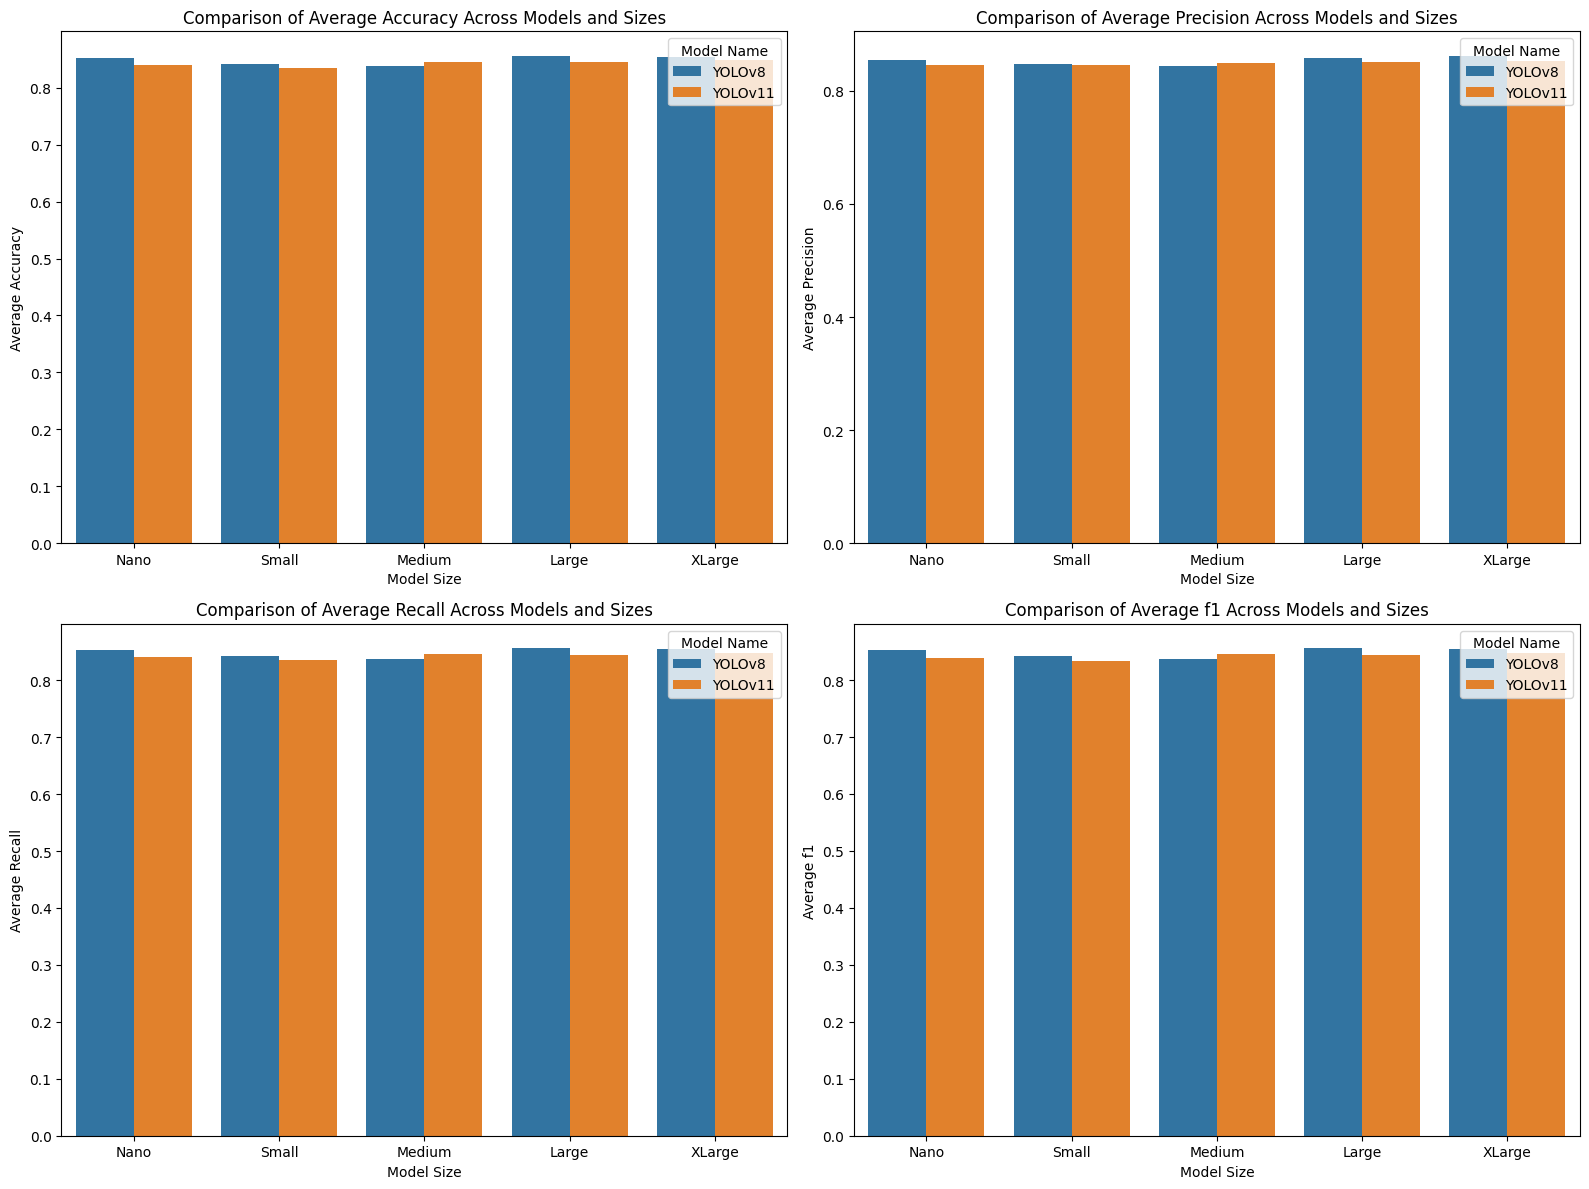

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the average results to a DataFrame
average_results_df = pd.DataFrame(average_results)

# Plot the key metrics (accuracy, precision, recall, F1) across different models and sizes
metrics = ["Average Accuracy", "Average Precision", "Average Recall", "Average f1"]

plt.figure(figsize=(16, 12))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(data=average_results_df, x="Model Size", y=metric, hue="Model Name")
    plt.title(f"Comparison of {metric} Across Models and Sizes")
    plt.ylabel(metric)
    plt.xlabel("Model Size")
    plt.legend(title="Model Name")

plt.tight_layout()
plt.show()


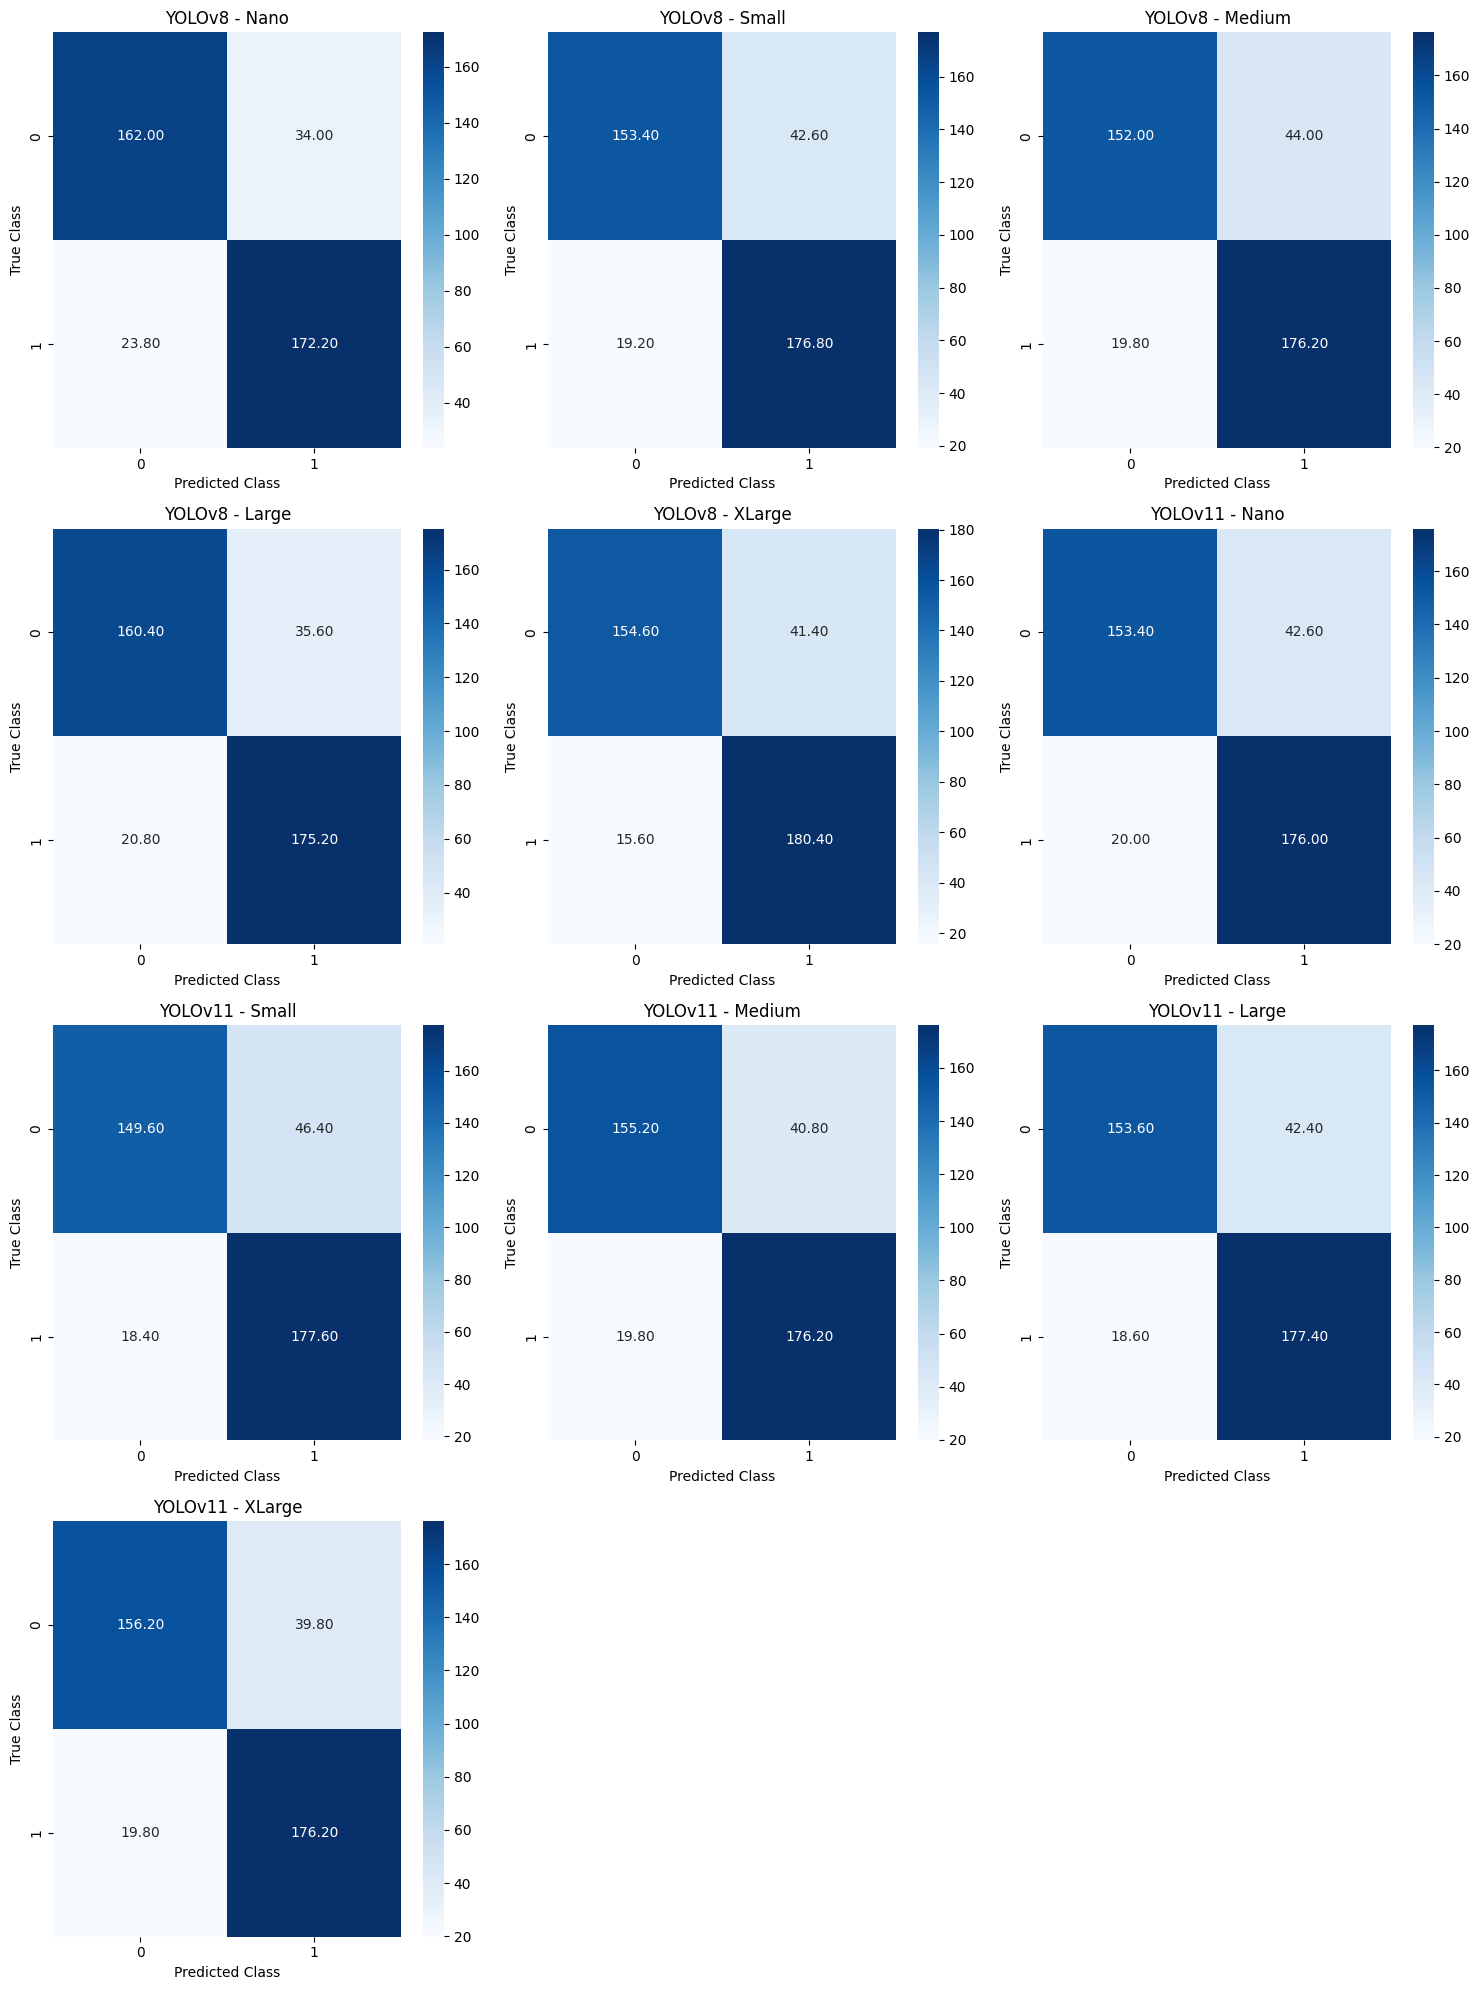

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of rows and columns for the grid
num_matrices = len(average_results_df)
ncols = 3  # Number of columns in the grid
nrows = (num_matrices // ncols) + (num_matrices % ncols > 0)  # Calculate rows needed

# Set up the figure for the grid of confusion matrices
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))

# Flatten axes to easily iterate over them
axes = axes.flatten()

# Plot each confusion matrix in the grid
for index, (ax, row) in enumerate(zip(axes, average_results_df.iterrows())):
    row_data = row[1]
    sns.heatmap(row_data["Average Confusion Matrix"], annot=True, fmt=".2f", cmap="Blues", cbar=True, ax=ax)
    ax.set_title(f"{row_data['Model Name']} - {row_data['Model Size']}")
    ax.set_xlabel("Predicted Class")
    ax.set_ylabel("True Class")

# Remove any unused subplots
for i in range(num_matrices, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## Experiment Settings
- class 0 = blurry, class 1 = good_quality
- 550 Images for train
- 195 Images for test

## Experiment results
- Good Results
- Around 93% for all metrics (accuracy, precision, recall and f1)
- In conf matrix class 0 = amber, 1 = clear and 2 = cloudy
- Best model to predict amber class is yolov8 Large.
